# Import Data

# DATA

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
linkHS2 = "C:\\Users\\k_pow\\OneDrive\\Documents\\Capstone\\EDA\\Massport_monthly_HS_2-digit_Import_2003-2023_by_Region.xlsx"
HS2 = pd.read_excel(linkHS2)
HS2

Port                                    Commodity  \
0      Boston, MA (Port)                02 Meat And Edible Meat Offal   
1      Boston, MA (Port)                02 Meat And Edible Meat Offal   
2      Boston, MA (Port)                02 Meat And Edible Meat Offal   
3      Boston, MA (Port)                02 Meat And Edible Meat Offal   
4      Boston, MA (Port)                02 Meat And Edible Meat Offal   
...                  ...                                          ...   
52013  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52014  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52015  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52016  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52017  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   

             Country       Time  Customs Value (Gen) ($US)  \
0       Asia - Other 2003-01-01                       1926   
1       Asia - Other 2003-03-01                        995   
2       Asia - Other 2003-04-01                        995   
3       Asia - Other 2003-05-01                        921   
4       Asia - Other 2003-06-01                       7302   
...              ...        ...                        ...   
52013  South America 2012-12-01                    3158065   
52014  South America 2017-10-01                         20   
52015  South America 2018-11-01                         48   
52016  South America 2019-11-01                      48743   
52017  South America 2020-09-01                      56549   

       Vessel Customs Value (Gen) ($US)  \
0                                1926.0   
1                                 995.0   
2                                 995.0   
3                                 921.0   
4                                7302.0   
...                                 ...   
52013                         3158065.0   
52014                              20.0   
52015                              48.0   
52016                           48743.0   
52017                           56549.0   

       Customs Containerized Vessel Value (Gen) ($US)  Vessel SWT (Gen) (kg)  \
0                                              1926.0                 4195.0   
1                                               995.0                19686.0   
2                                               995.0                19686.0   
3                                               921.0                20975.0   
4                                              7302.0                  195.0   
...                                               ...                    ...   
52013                                             NaN                63161.0   
52014                                             NaN                  262.0   
52015                                            48.0                 2603.0   
52016                                         48743.0                11745.0   
52017                                         56549.0                22598.0   

       Containerized Vessel SWT (Gen) (kg)  
0                                   4195.0  
1                                  19686.0  
2                                  19686.0  
3                                  20975.0  
4                                    195.0  
...                                    ...  
52013                                  NaN  
52014                                  NaN  
52015                               2603.0  
52016                              11745.0  
52017                              22598.0  

[52018 rows x 9 columns]

In [5]:
HS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52018 entries, 0 to 52017
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Port                                            52018 non-null  object        
 1   Commodity                                       52018 non-null  object        
 2   Country                                         52018 non-null  object        
 3   Time                                            52018 non-null  datetime64[ns]
 4   Customs Value (Gen) ($US)                       52018 non-null  int64         
 5   Vessel Customs Value (Gen) ($US)                51347 non-null  float64       
 6   Customs Containerized Vessel Value (Gen) ($US)  49561 non-null  float64       
 7   Vessel SWT (Gen) (kg)                           51341 non-null  float64       
 8   Containerized Vessel SWT (Gen) (kg)            

In [6]:
HS2.isna().sum()

Port                                                 0
Commodity                                            0
Country                                              0
Time                                                 0
Customs Value (Gen) ($US)                            0
Vessel Customs Value (Gen) ($US)                   671
Customs Containerized Vessel Value (Gen) ($US)    2457
Vessel SWT (Gen) (kg)                              677
Containerized Vessel SWT (Gen) (kg)               2459
dtype: int64

# TOP5 Value

In [7]:
top5_value = HS2.groupby('Commodity')['Customs Containerized Vessel Value (Gen) ($US)'].sum().nlargest(5).index

In [8]:
filtered_HS2 = HS2[HS2['Commodity'].isin(top5_value)]

In [9]:
SUM_values = filtered_HS2.groupby(['Time','Commodity'])['Customs Containerized Vessel Value (Gen) ($US)'].sum().unstack()

In [10]:
SUM_values

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2003-01-01                                    29386199.0   
2003-02-01                                    24814505.0   
2003-03-01                                    23494666.0   
2003-04-01                                    22048828.0   
2003-05-01                                    17935701.0   
...                                                  ...   
2023-04-01                                    25437932.0   
2023-05-01                                    34502535.0   
2023-06-01                                    27687079.0   
2023-07-01                                    32756416.0   
2023-08-01                                    35324050.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2003-01-01                         11795099.0   
2003-02-01                         14078101.0   
2003-03-01                         17996308.0   
2003-04-01                         22834995.0   
2003-05-01                         20426797.0   
...                                       ...   
2023-04-01                         33497739.0   
2023-05-01                         40384107.0   
2023-06-01                         39033801.0   
2023-07-01                         29772975.0   
2023-08-01                         40149868.0   

Commodity   39 Plastics And Articles Thereof  \
Time                                           
2003-01-01                         3877912.0   
2003-02-01                         3112138.0   
2003-03-01                         3585574.0   
2003-04-01                         3890497.0   
2003-05-01                         3564027.0   
...                                      ...   
2023-04-01                        22052627.0   
2023-05-01                        25727748.0   
2023-06-01                        15645296.0   
2023-07-01                        20190060.0   
2023-08-01                        26999655.0   

Commodity   84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Time                                                              
2003-01-01                                         16211339.0     
2003-02-01                                         10582494.0     
2003-03-01                                         12873577.0     
2003-04-01                                         13653132.0     
2003-05-01                                         21702262.0     
...                                                       ...     
2023-04-01                                         53330039.0     
2023-05-01                                         64351866.0     
2023-06-01                                         53942981.0     
2023-07-01                                         52292641.0     
2023-08-01                                         76513296.0     

Commodity   85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Time                                                               
2003-01-01                                          8959654.0      
2003-02-01                                          4858470.0      
2003-03-01                                          8357997.0      
2003-04-01                                         10333188.0      
2003-05-01                                          4783456.0      
...                                                       ...      
2023-04-01                                         26138936.0      
2023-05-01                                         23862168.0      
2023-06-01                                         15986702.0      
2023-07-01                                         31984723.0      
2023-08-01                                         27236561.0      

[248 rows x 5 columns]

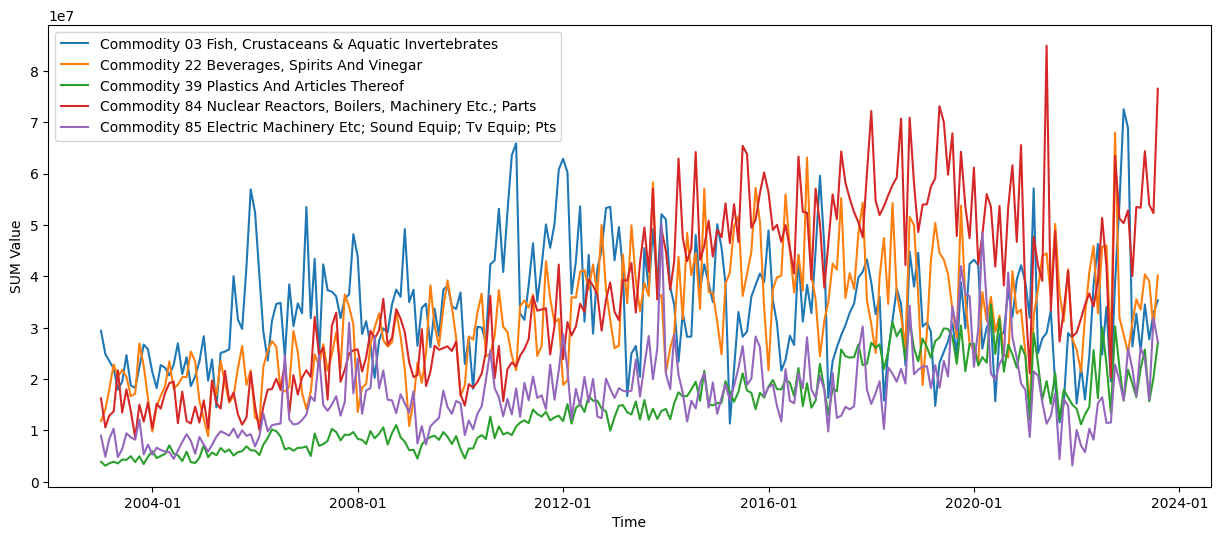

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for commodity in SUM_values.columns:
  plt.plot(SUM_values.index, SUM_values[commodity], label=f'Commodity {commodity}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

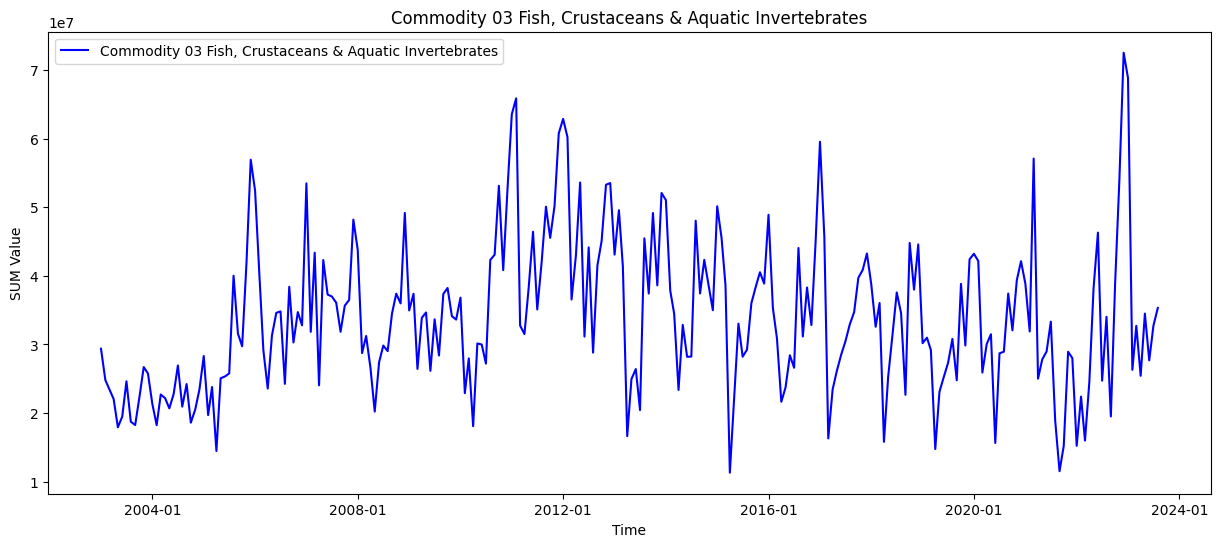

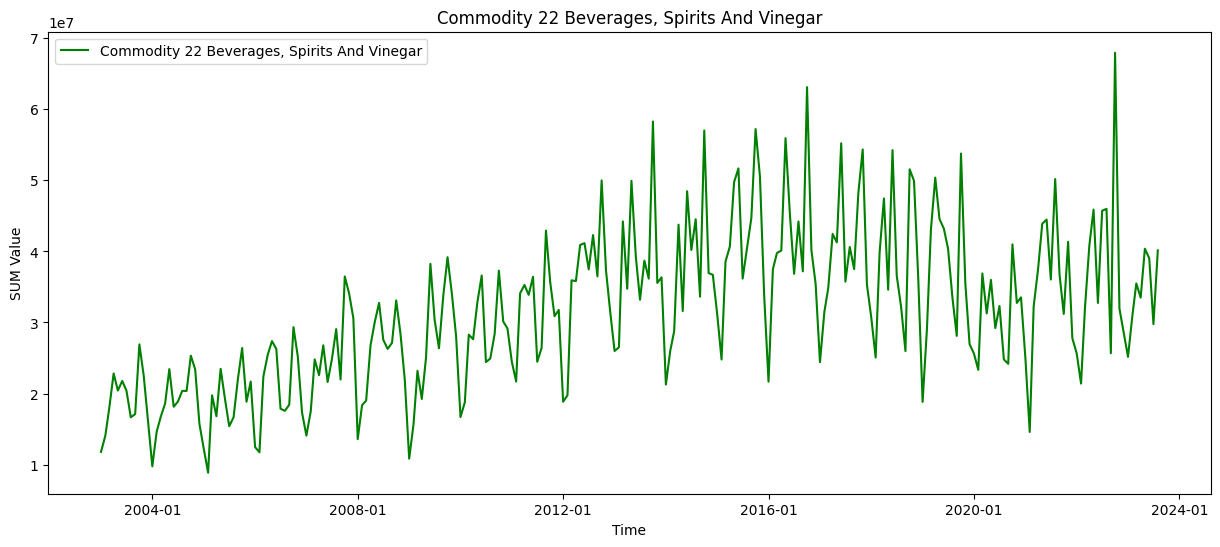

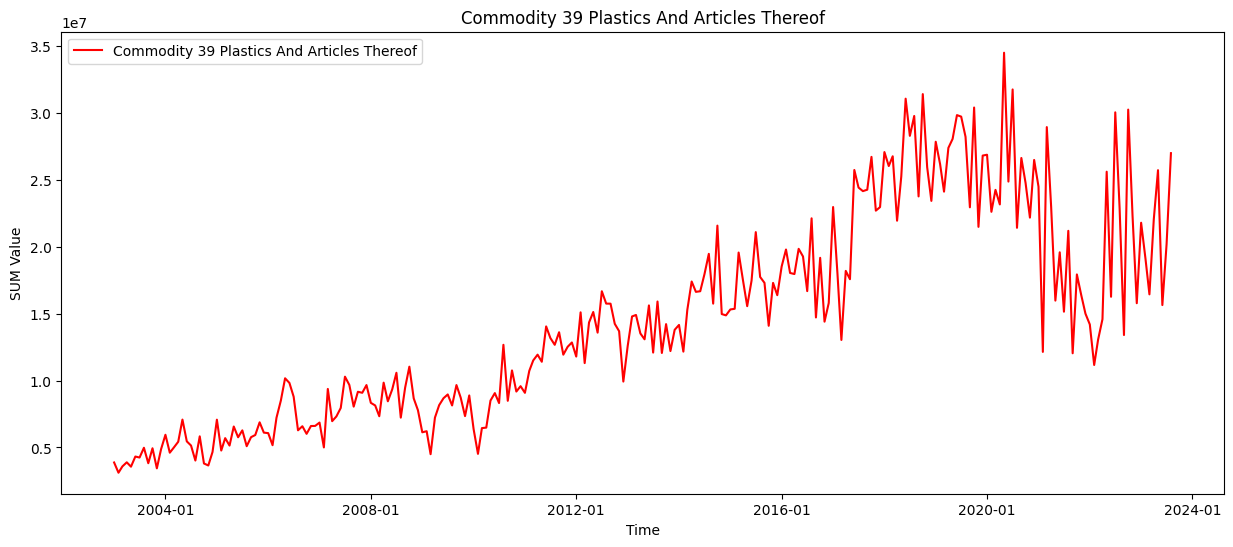

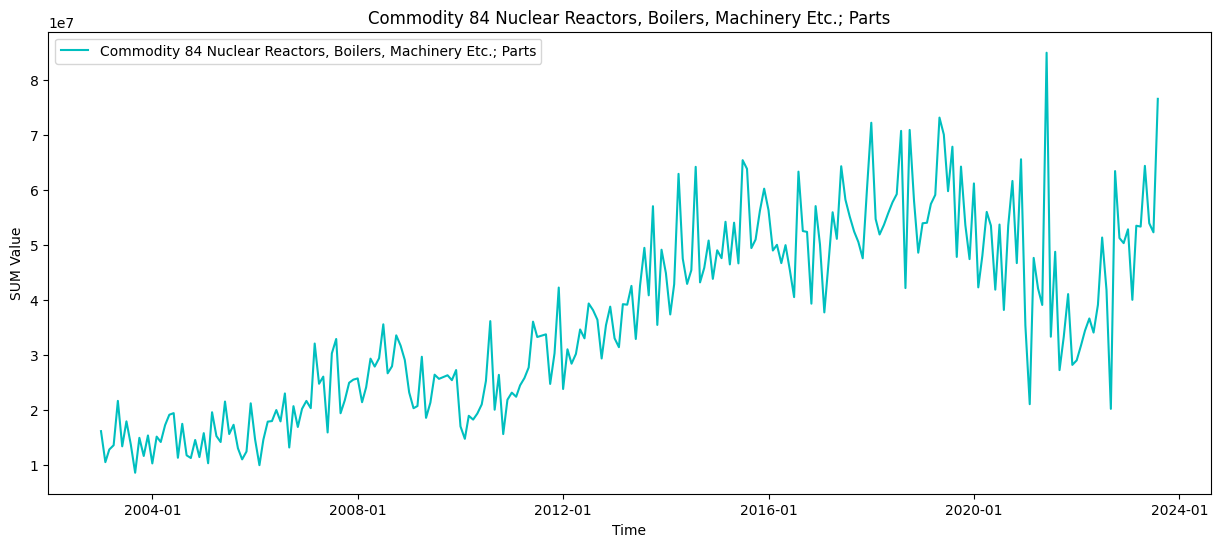

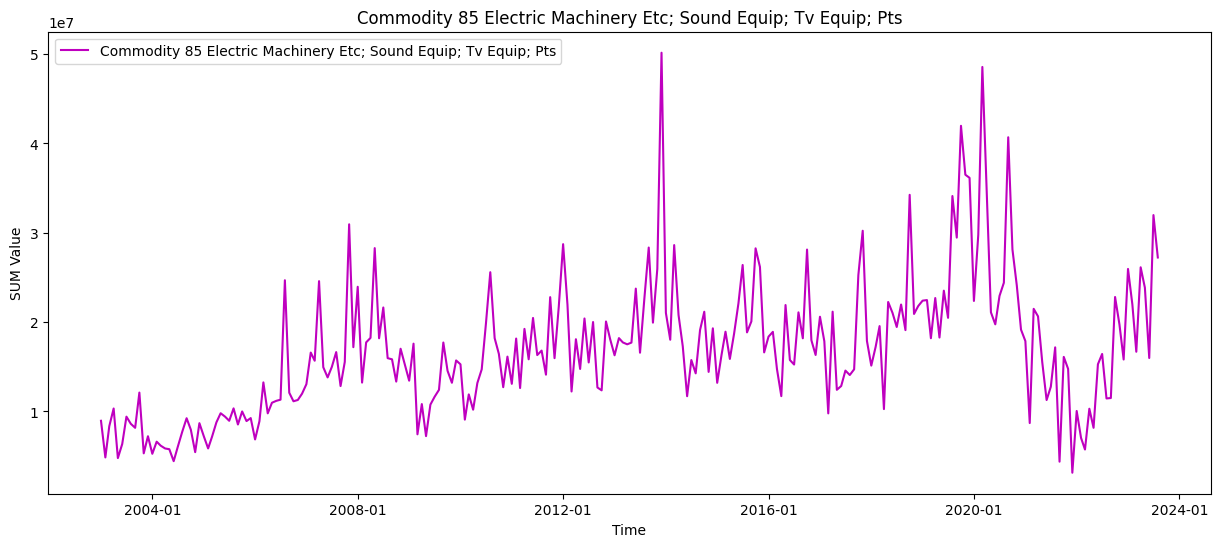

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']
color_index = 0

for commodity in SUM_values.columns:
    plt.figure(figsize=(15, 6))
    plt.plot(SUM_values.index, SUM_values[commodity], label=f'Commodity {commodity}', color=colors[color_index])

    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    plt.xlabel('Time')
    plt.ylabel('SUM Value')
    plt.title(f'Commodity {commodity}')
    plt.legend(loc='upper left')
    plt.show()

    color_index = (color_index + 1) % len(colors)  # Increment color index and loop back if necessary

In [ ]:
corr_matrix = SUM_values.corr()
corr_matrix

Commodity                                           03 Fish, Crustaceans & Aquatic Invertebrates  \
Commodity                                                                                          
03 Fish, Crustaceans & Aquatic Invertebrates                                            1.000000   
22 Beverages, Spirits And Vinegar                                                       0.041920   
39 Plastics And Articles Thereof                                                        0.129516   
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                                      0.152844   
85 Electric Machinery Etc; Sound Equip; Tv Equi...                                      0.292011   

Commodity                                           22 Beverages, Spirits And Vinegar  \
Commodity                                                                               
03 Fish, Crustaceans & Aquatic Invertebrates                                 0.041920   
22 Beverages, Spirits And Vinegar                                            1.000000   
39 Plastics And Articles Thereof                                             0.618331   
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                           0.676851   
85 Electric Machinery Etc; Sound Equip; Tv Equi...                           0.396650   

Commodity                                           39 Plastics And Articles Thereof  \
Commodity                                                                              
03 Fish, Crustaceans & Aquatic Invertebrates                                0.129516   
22 Beverages, Spirits And Vinegar                                           0.618331   
39 Plastics And Articles Thereof                                            1.000000   
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                          0.878878   
85 Electric Machinery Etc; Sound Equip; Tv Equi...                          0.585245   

Commodity                                           84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Commodity                                                                                                 
03 Fish, Crustaceans & Aquatic Invertebrates                                                 0.152844     
22 Beverages, Spirits And Vinegar                                                            0.676851     
39 Plastics And Articles Thereof                                                             0.878878     
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                                           1.000000     
85 Electric Machinery Etc; Sound Equip; Tv Equi...                                           0.587312     

Commodity                                           85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Commodity                                                                                                  
03 Fish, Crustaceans & Aquatic Invertebrates                                                 0.292011      
22 Beverages, Spirits And Vinegar                                                            0.396650      
39 Plastics And Articles Thereof                                                             0.585245      
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                                           0.587312      
85 Electric Machinery Etc; Sound Equip; Tv Equi...                                           1.000000

In [ ]:
!pip install stemgraphic
import stemgraphic

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=692730516471c270938cb1bc5f10b685050f18531d88d343ea8b921325cc0290
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


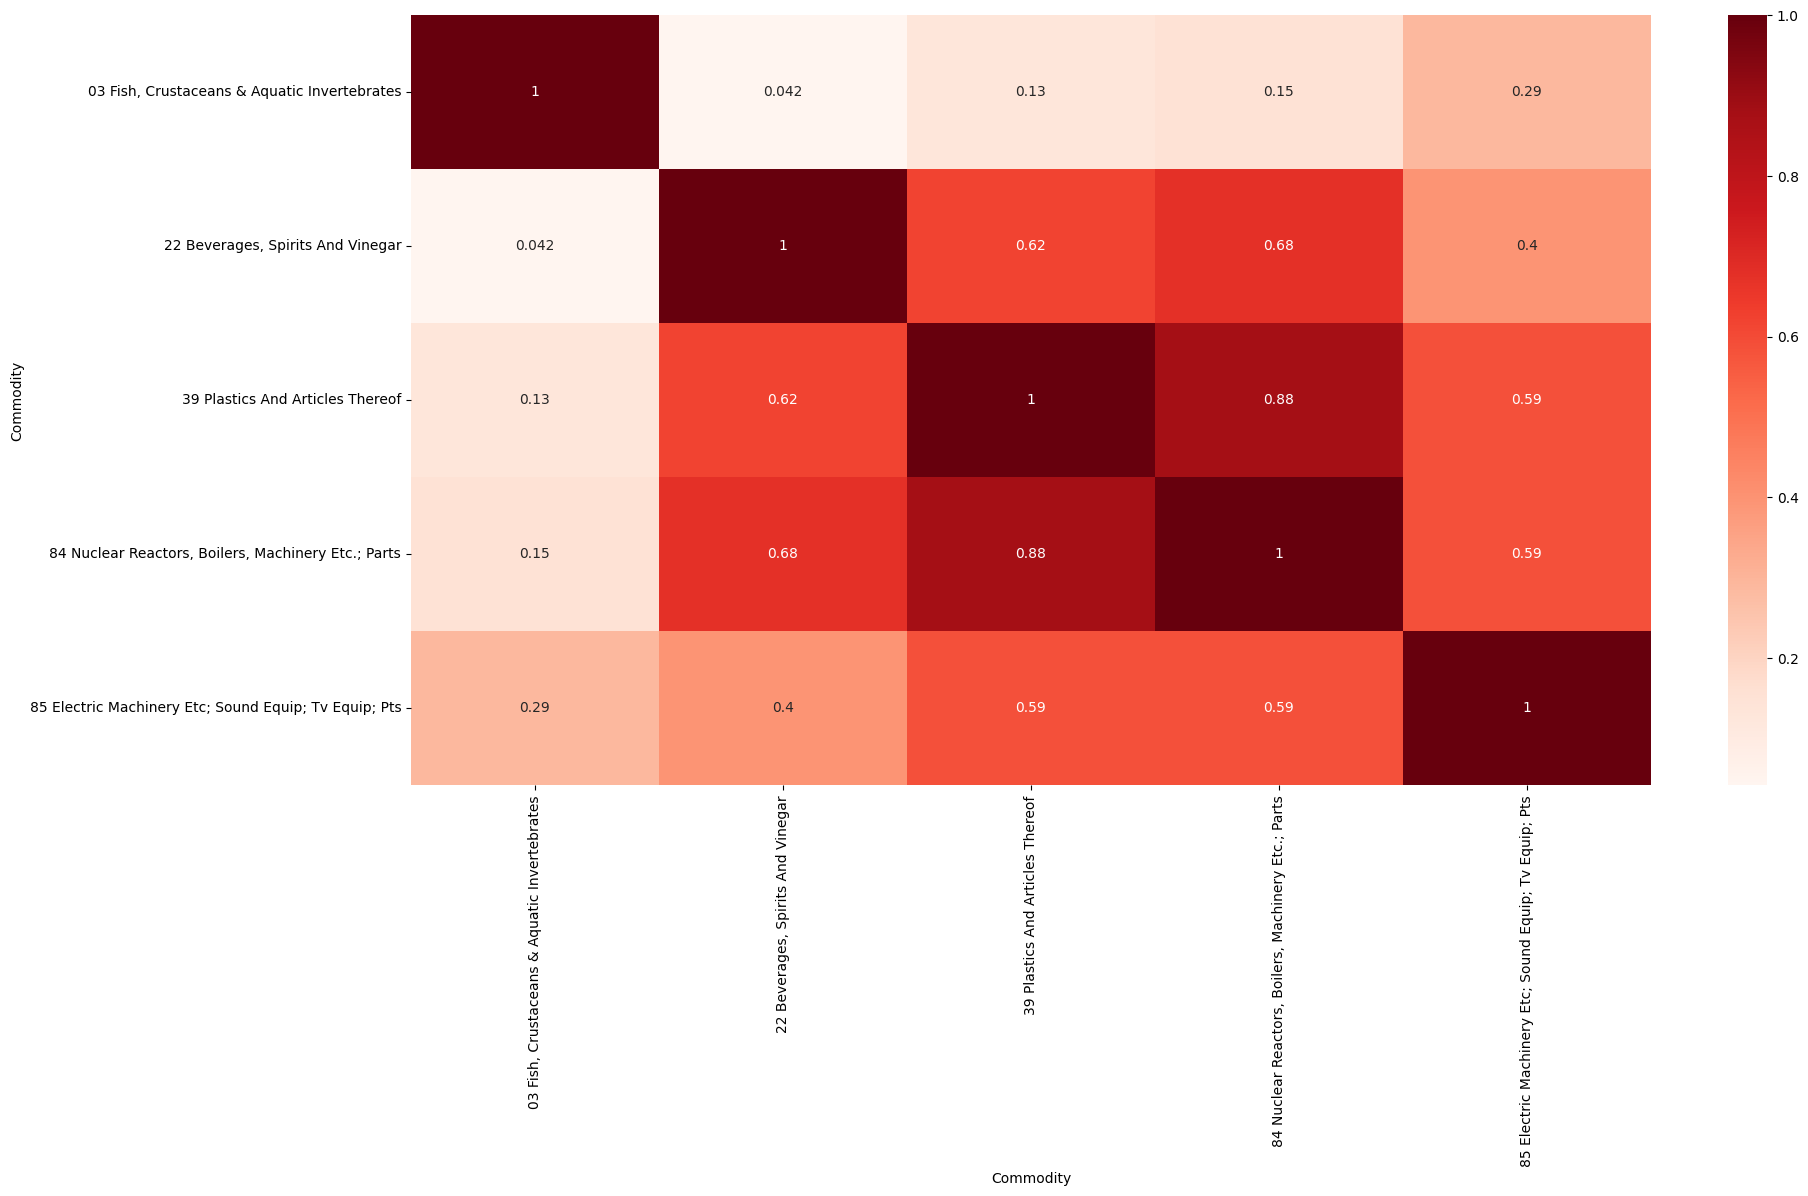

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
cor = SUM_values.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

There is a strong correlation between 39 plastics and 84 nuclear reactors. We can aggragate them together to see a common trend for chemical commodities.

# TOP5 Weight

In [ ]:
top5_weight = HS2.groupby('Commodity')['Containerized Vessel SWT (Gen) (kg)'].sum().nlargest(5).index

In [ ]:
filtered_WGT_HS2 = HS2[HS2['Commodity'].isin(top5_weight)]

In [ ]:
SUM_weight = filtered_WGT_HS2.groupby(['Time','Commodity'])['Containerized Vessel SWT (Gen) (kg)'].sum().unstack()

In [ ]:
SUM_weight.fillna(0)
SUM_weight

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2003-01-01                                     7387051.0   
2003-02-01                                     6370868.0   
2003-03-01                                     5989469.0   
2003-04-01                                     5509494.0   
2003-05-01                                     4292678.0   
...                                                  ...   
2023-04-01                                     3390034.0   
2023-05-01                                     4873265.0   
2023-06-01                                     4053676.0   
2023-07-01                                     4720685.0   
2023-08-01                                     5097673.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2003-01-01                          8132881.0   
2003-02-01                         11613410.0   
2003-03-01                         11815315.0   
2003-04-01                         16230065.0   
2003-05-01                         13594934.0   
...                                       ...   
2023-04-01                          9091357.0   
2023-05-01                         11719471.0   
2023-06-01                         10524393.0   
2023-07-01                          9019337.0   
2023-08-01                         12479391.0   

Commodity   25 Salt; Sulfur; Earth & Stone; Lime & Cement Plaster  \
Time                                                                
2003-01-01                                            10698.0       
2003-02-01                                            69962.0       
2003-03-01                                         43059445.0       
2003-04-01                                             1015.0       
2003-05-01                                            17171.0       
...                                                       ...       
2023-04-01                                           343595.0       
2023-05-01                                           507538.0       
2023-06-01                                           320448.0       
2023-07-01                                           453224.0       
2023-08-01                                           929589.0       

Commodity   27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral Wax  \
Time                                                                
2003-01-01                                            32141.0       
2003-02-01                                                0.0       
2003-03-01                                         20222071.0       
2003-04-01                                             6794.0       
2003-05-01                                            32042.0       
...                                                       ...       
2023-04-01                                            15950.0       
2023-05-01                                             9129.0       
2023-06-01                                            73477.0       
2023-07-01                                            53412.0       
2023-08-01                                         15086933.0       

Commodity   68 Art Of Stone, Plaster, Cement, Asbestos, Mica Etc.  
Time                                                               
2003-01-01                                          2057732.0      
2003-02-01                                          1869919.0      
2003-03-01                                          1812797.0      
2003-04-01                                          2295678.0      
2003-05-01                                          2250916.0      
...                                                       ...      
2023-04-01                                          5651827.0      
2023-05-01                                          9573438.0      
2023-06-01                                          5010871.0      
2023-07-01                           

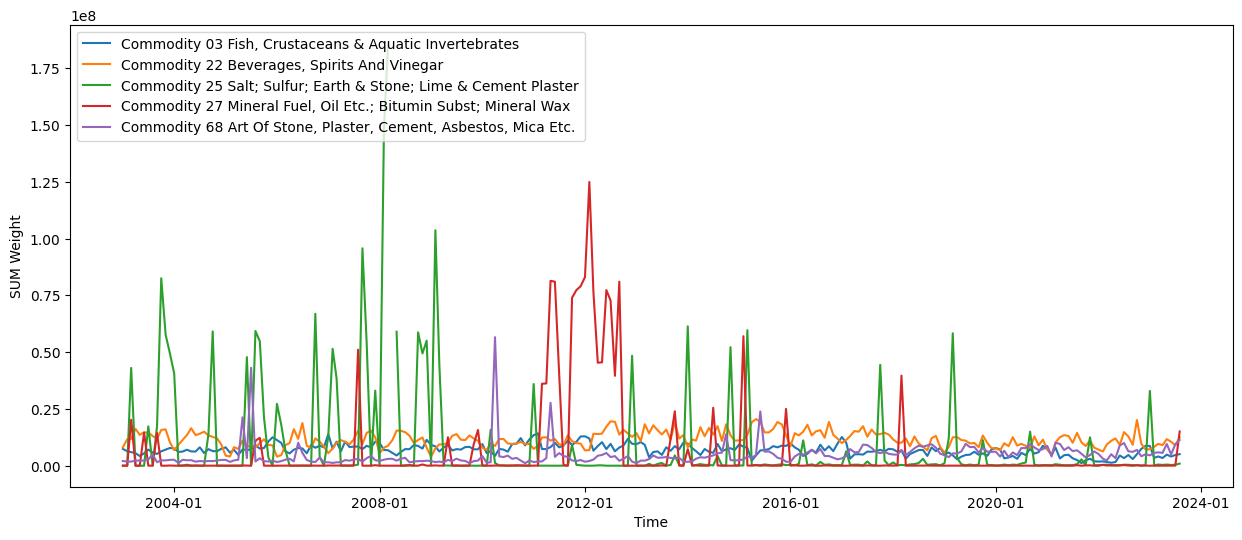

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for commodity in SUM_weight.columns:
  plt.plot(SUM_weight.index, SUM_weight[commodity], label=f'Commodity {commodity}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

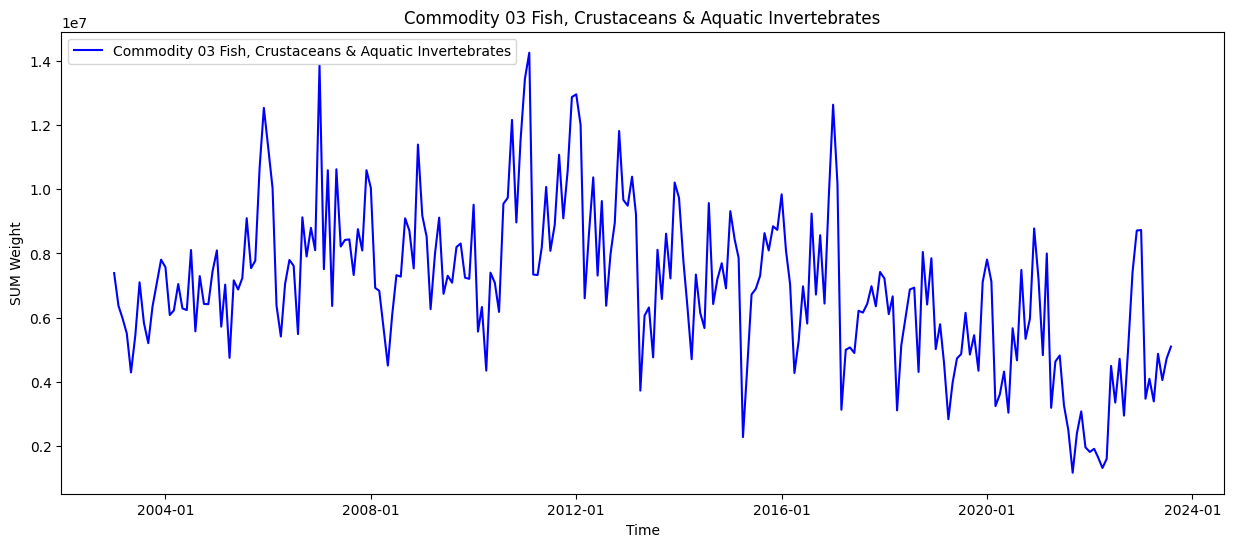

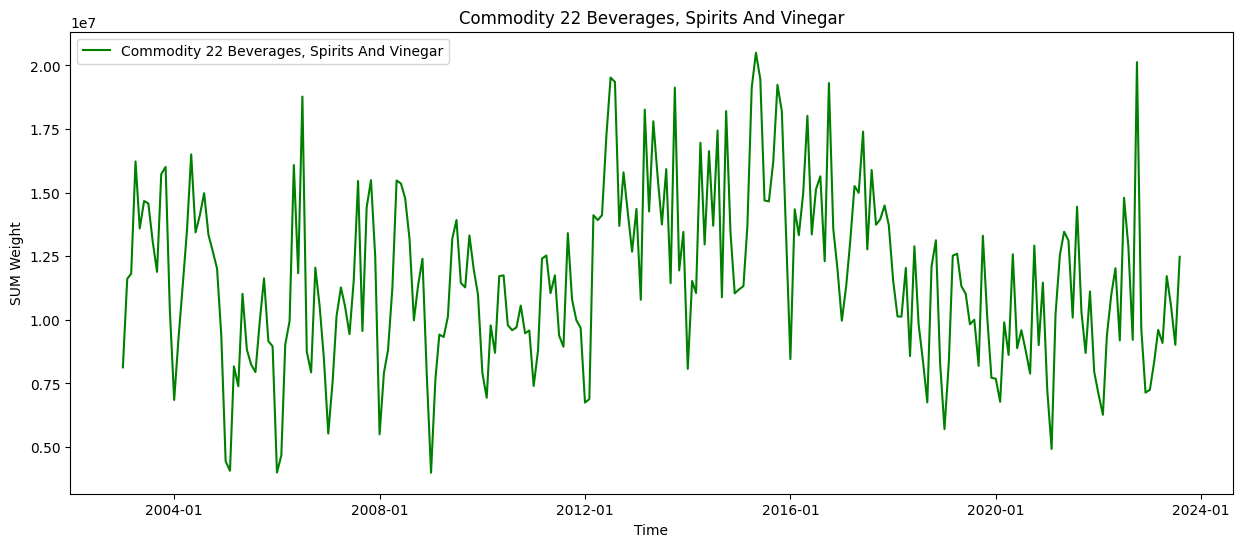

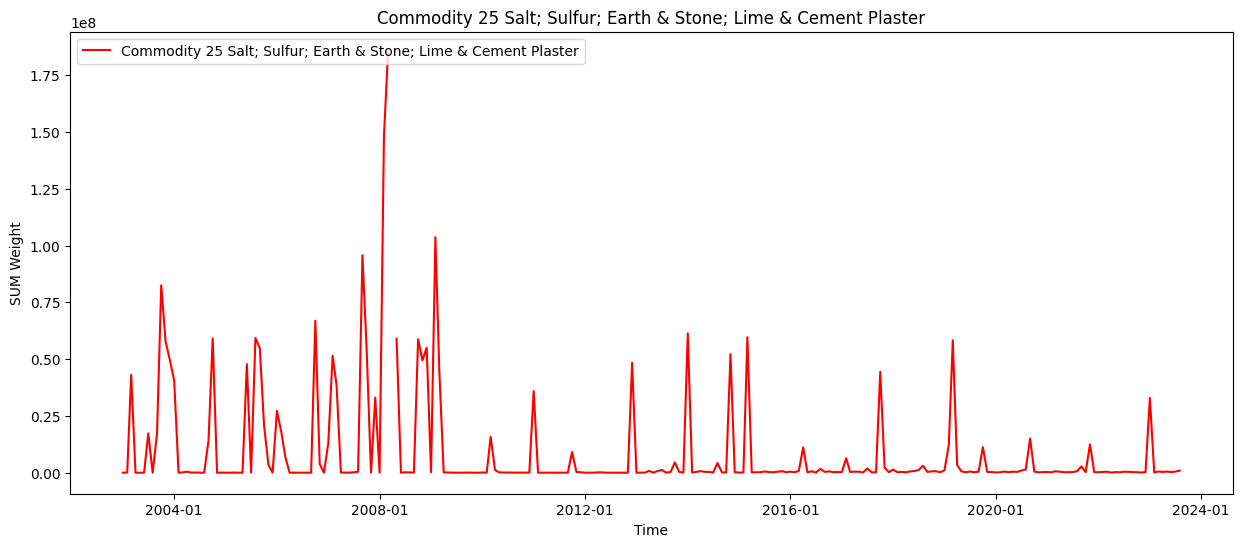

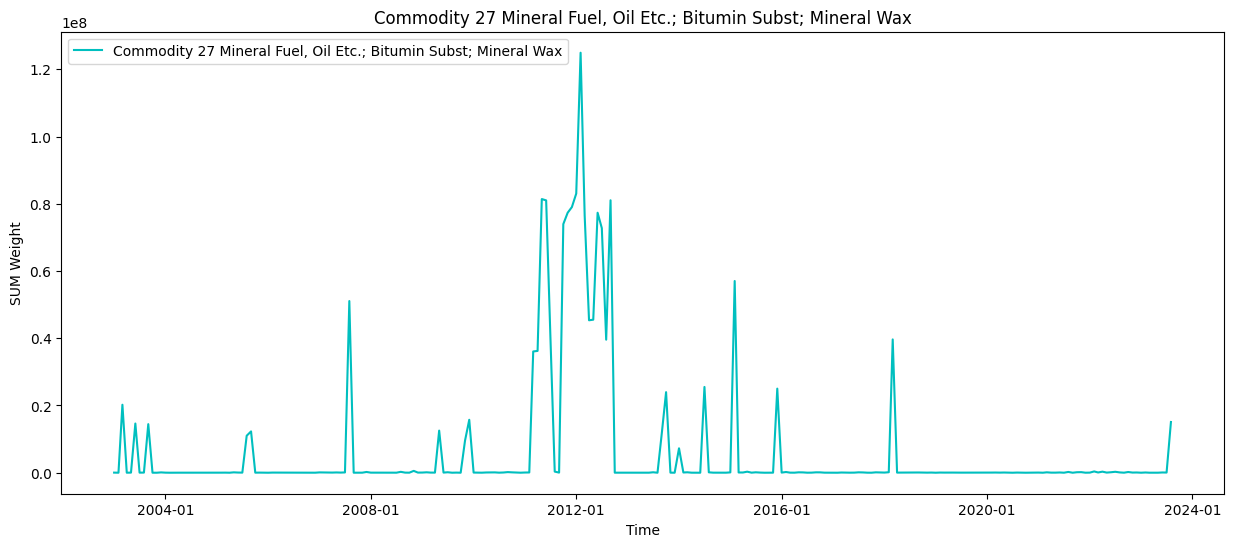

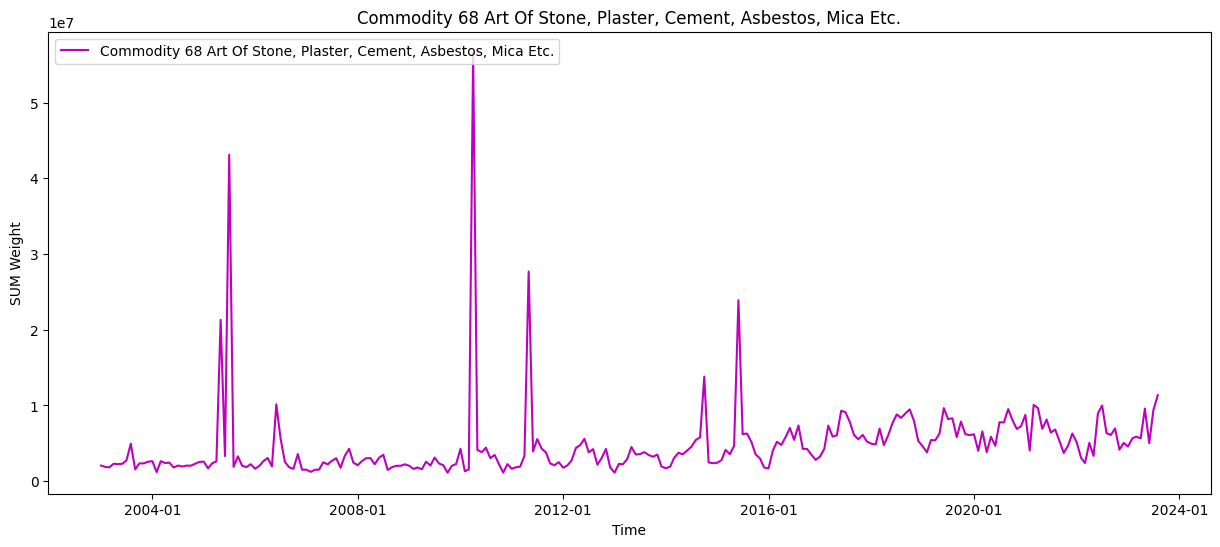

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']
color_index = 0

for commodity in SUM_weight.columns:
    plt.figure(figsize=(15, 6))
    plt.plot(SUM_weight.index, SUM_weight[commodity], label=f'Commodity {commodity}', color=colors[color_index])

    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    plt.xlabel('Time')
    plt.ylabel('SUM Weight')
    plt.title(f'Commodity {commodity}')
    plt.legend(loc='upper left')
    plt.show()

    color_index = (color_index + 1) % len(colors)

In [ ]:
corr_matrix_w = SUM_weight.corr()
corr_matrix_w

Commodity                                           03 Fish, Crustaceans & Aquatic Invertebrates  \
Commodity                                                                                          
03 Fish, Crustaceans & Aquatic Invertebrates                                            1.000000   
22 Beverages, Spirits And Vinegar                                                      -0.103791   
25 Salt; Sulfur; Earth & Stone; Lime & Cement P...                                      0.108647   
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                                      0.269575   
68 Art Of Stone, Plaster, Cement, Asbestos, Mic...                                     -0.211144   

Commodity                                           22 Beverages, Spirits And Vinegar  \
Commodity                                                                               
03 Fish, Crustaceans & Aquatic Invertebrates                                -0.103791   
22 Beverages, Spirits And Vinegar                                            1.000000   
25 Salt; Sulfur; Earth & Stone; Lime & Cement P...                          -0.119543   
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                           0.050591   
68 Art Of Stone, Plaster, Cement, Asbestos, Mic...                           0.024809   

Commodity                                           25 Salt; Sulfur; Earth & Stone; Lime & Cement Plaster  \
Commodity                                                                                                   
03 Fish, Crustaceans & Aquatic Invertebrates                                                 0.108647       
22 Beverages, Spirits And Vinegar                                                           -0.119543       
25 Salt; Sulfur; Earth & Stone; Lime & Cement P...                                           1.000000       
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                                          -0.090737       
68 Art Of Stone, Plaster, Cement, Asbestos, Mic...                                          -0.152098       

Commodity                                           27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral Wax  \
Commodity                                                                                                   
03 Fish, Crustaceans & Aquatic Invertebrates                                                 0.269575       
22 Beverages, Spirits And Vinegar                                                            0.050591       
25 Salt; Sulfur; Earth & Stone; Lime & Cement P...                                          -0.090737       
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                                           1.000000       
68 Art Of Stone, Plaster, Cement, Asbestos, Mic...                                          -0.014764       

Commodity                                           68 Art Of Stone, Plaster, Cement, Asbestos, Mica Etc.  
Commodity                                                                                                  
03 Fish, Crustaceans & Aquatic Invertebrates                                                -0.211144      
22 Beverages, Spirits And Vinegar                                                            0.024809      
25 Salt; Sulfur; Earth & Stone; Lime & Cement P...                                          -0.152098      
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                                          -0.014764      
68 Art Of Stone, Plaster, Cement, Asbestos, Mic...                                           1.000000

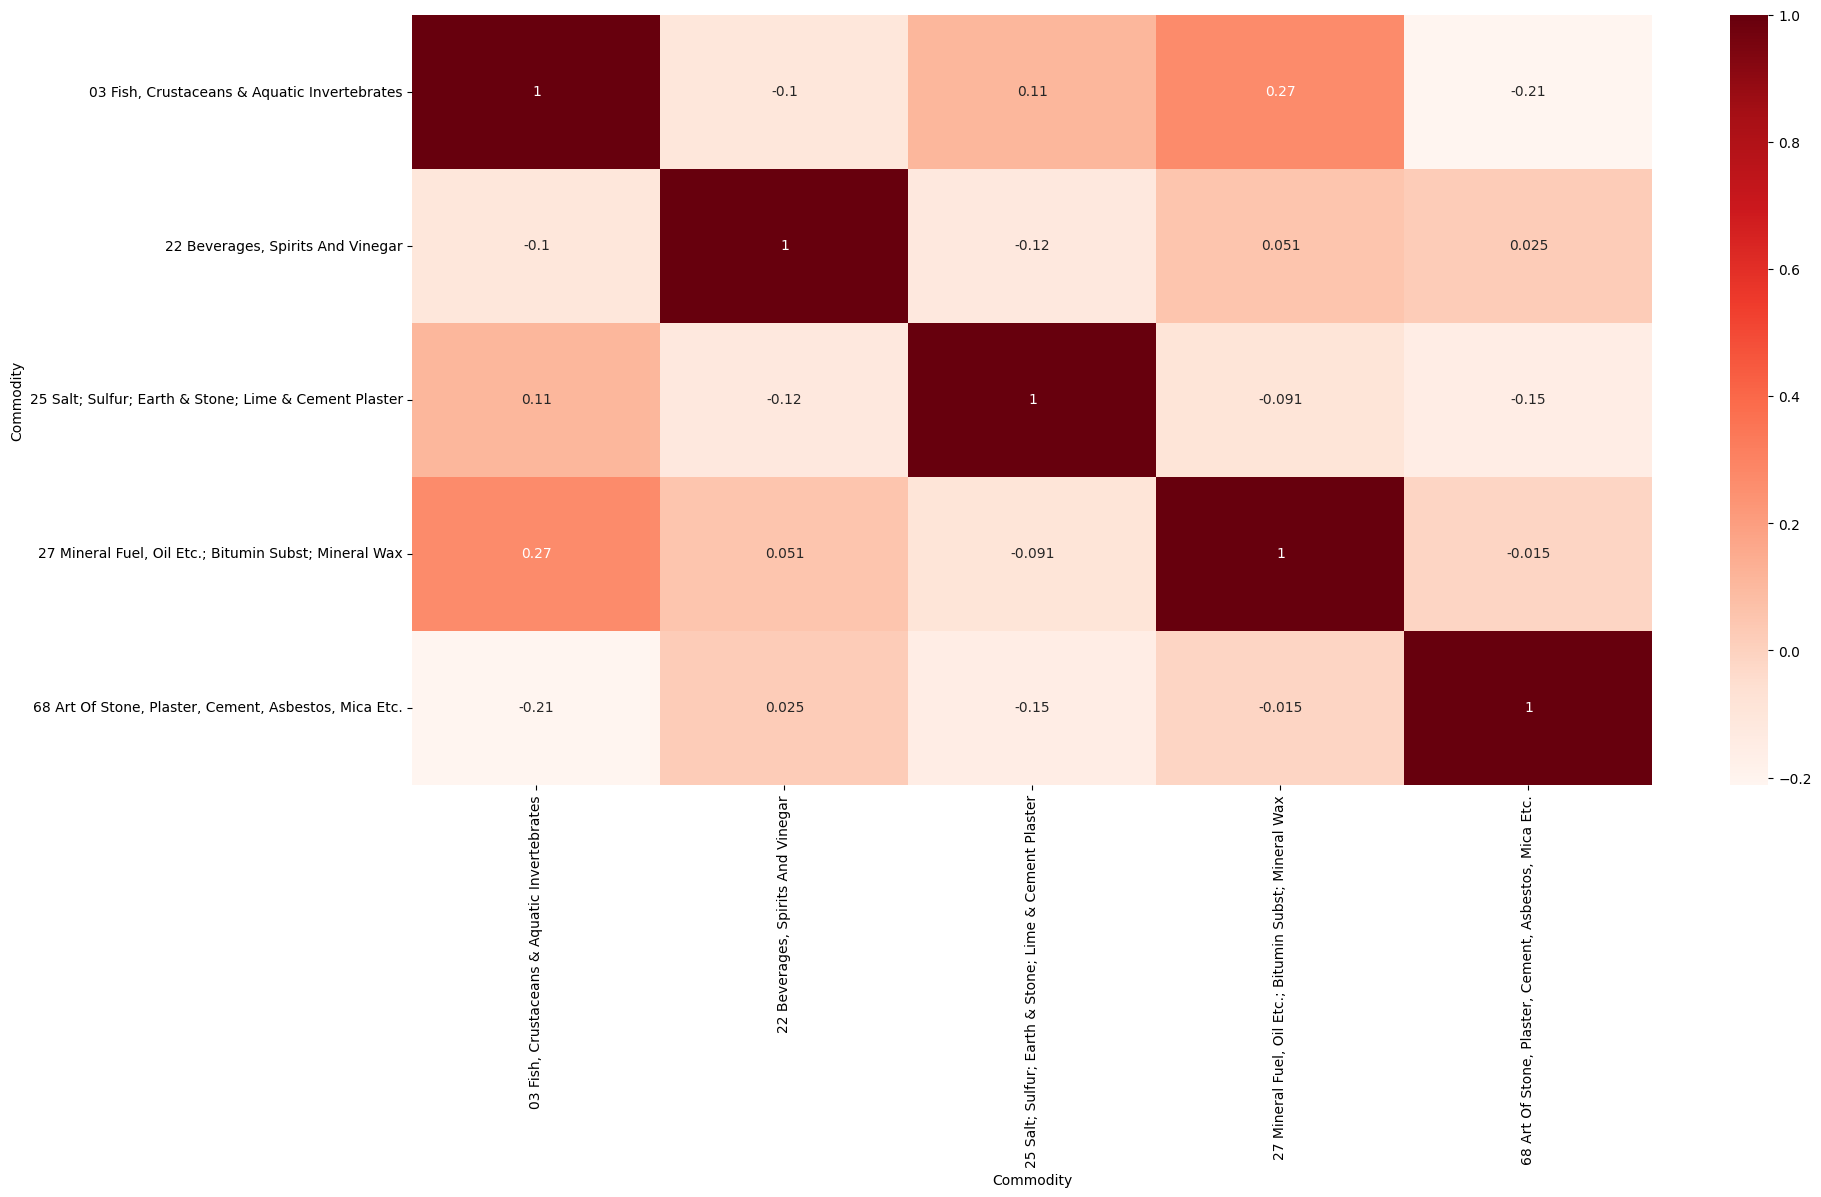

In [ ]:
plt.figure(figsize=(20,10))
cor = SUM_weight.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

No correlation, so I will just have a look for the most weighted commodity 22 beverages.

# Value - Time Seiries

In [ ]:
!pip install pmdarima
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.1 MB/s eta 0:00:00


In [ ]:
SUM_values['84Nuclear_39Plastics'] = SUM_values['39 Plastics And Articles Thereof']+SUM_values['84 Nuclear Reactors, Boilers, Machinery Etc.; Parts']

In [ ]:
Value_84_39 = SUM_values[['84Nuclear_39Plastics']]

In [ ]:
Value22 = SUM_values[['22 Beverages, Spirits And Vinegar']]
Value22 = Value22.loc['2015-01-01':]
Value22

Commodity   22 Beverages, Spirits And Vinegar
Time                                         
2015-01-01                         31151021.0
2015-02-01                         24794845.0
2015-03-01                         38568001.0
2015-04-01                         40693359.0
2015-05-01                         49741833.0
...                                       ...
2023-04-01                         33497739.0
2023-05-01                         40384107.0
2023-06-01                         39033801.0
2023-07-01                         29772975.0
2023-08-01                         40149868.0

[104 rows x 1 columns]

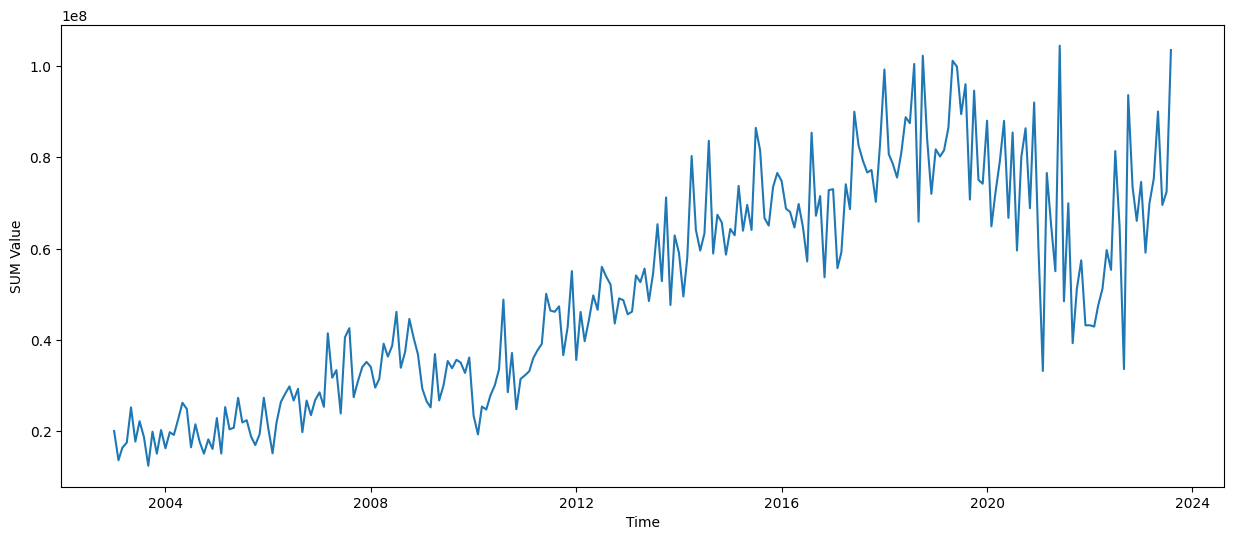

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(Value_84_39.index, Value_84_39)
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

In [ ]:
Value_84_39

Commodity   84Nuclear_39Plastics
Time                            
2003-01-01            20089251.0
2003-02-01            13694632.0
2003-03-01            16459151.0
2003-04-01            17543629.0
2003-05-01            25266289.0
...                          ...
2023-04-01            75382666.0
2023-05-01            90079614.0
2023-06-01            69588277.0
2023-07-01            72482701.0
2023-08-01           103512951.0

[248 rows x 1 columns]

In [ ]:
temp = pd.Series(Value_84_39['84Nuclear_39Plastics'].values, index=Value_84_39.index)
temp.index.freq = 'MS'
decomp = seasonal_decompose(temp)

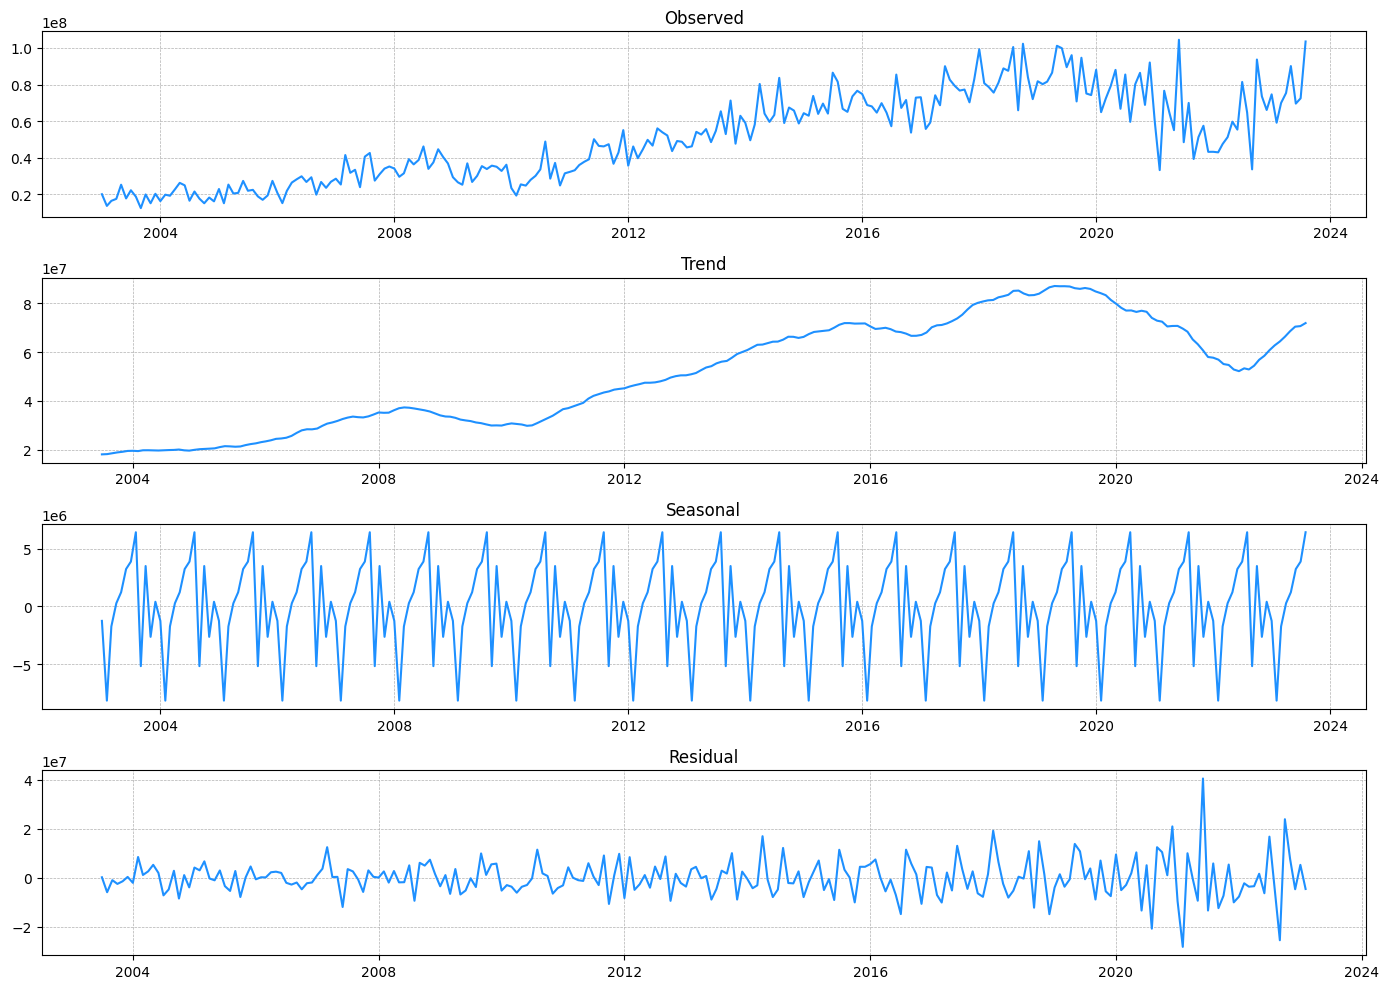

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
def auto_arima_model(df):
  s = df.columns[0]
  print(s)
  y = pd.DataFrame(df[df.columns[0]])

  train,test = train_test_split(y,train_size=0.75,shuffle=False)
  model = auto_arima(train, trace=True, error_action='ignore',
                     suppress_warnings=True, seasonal=True, m=12, stepwise=True)

  fitted_model = model.fit(train)

  start_index = test.index.min()
  end_index = test.index.max()
  forecast = fitted_model.predict(n_periods=len(test))
  forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

  mape = mean_absolute_percentage_error(y[start_index:end_index], forecast)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(y[start_index:end_index], forecast, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(y[start_index:end_index], forecast)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(forecast, label='Prediction auto arima',color='C0')
  plt.xlabel('Time')
  plt.ylabel('SUM Value')
  plt.legend()
  plt.show()

22 Beverages, Spirits And Vinegar
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2723.335, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2698.581, Time=0.84 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2697.761, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2721.359, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2714.746, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2692.364, Time=1.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2692.048, Time=0.44 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2693.013, Time=1.45 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2694.356, Time=2.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2710.249, Time=0.79 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2691.375, Time=2.81 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2709.042, Time=0.77 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2692.302, Time

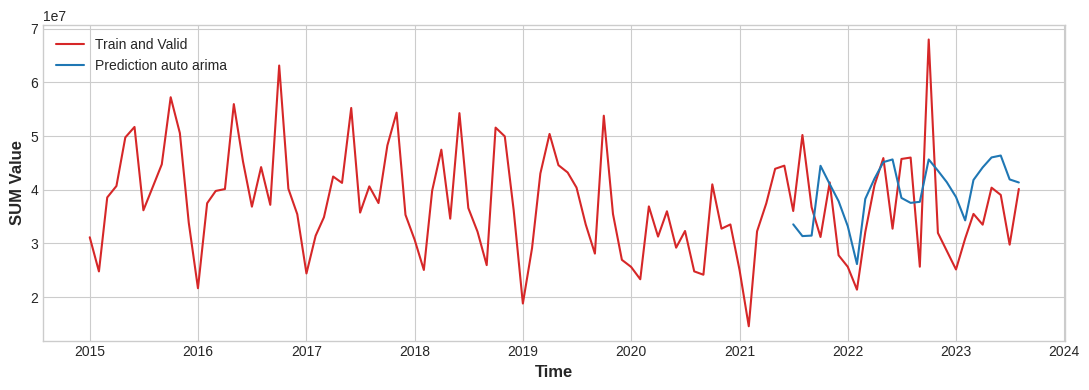

In [ ]:
auto_arima_model(Value22)

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def Holt_Winters(df):
  s = df.columns[0]
  print(s)
  df= df[df[df.columns[0]] != 0]
  y = pd.DataFrame(df[df.columns[0]])
  train,test = train_test_split(y,train_size=0.75,shuffle=False)

  model = ExponentialSmoothing(train, trend='add',seasonal = 'mul', seasonal_periods= 12)
  fitted_model = model.fit()
  print("Alpha value from the model is ", fitted_model.params['smoothing_level'])
  print("Beta value from the model is ", fitted_model.params['smoothing_trend'])
  print("Gamma value from the model is ", fitted_model.params['smoothing_seasonal'])

  y_ses = pd.Series(fitted_model.forecast(len(test)), index=test.index)

  mape = mean_absolute_percentage_error(test, y_ses)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(test, y_ses, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(test, y_ses)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(y_ses, label='HW Predictions',color='blue')
  plt.xlabel('Time')
  plt.ylabel('SUM Value')
  plt.legend();
  plt.show()

22 Beverages, Spirits And Vinegar
Alpha value from the model is  0.07571428571428572
Beta value from the model is  0.07571428571428572
Gamma value from the model is  0.0001
MAPE:0.24634720109972288
RMSE:12063737.02366184
MAE:9693630.63298325


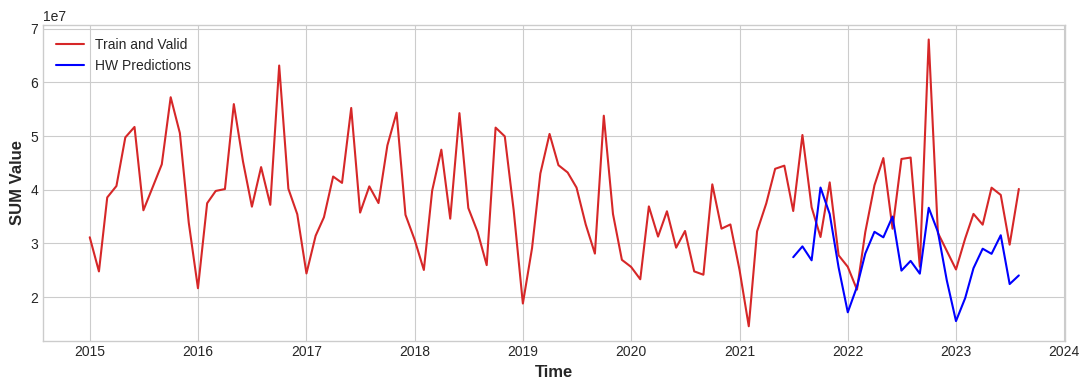

In [ ]:
Holt_Winters(Value22)

In [ ]:
HS87 = HS2[HS2['Commodity'] == '87 Vehicles, Except Railway Or Tramway, And Parts Etc']
Value_HS87 = pd.DataFrame(HS87.groupby('Time')['Vessel Customs Value (Gen) ($US)'].sum())

In [ ]:
temp2 = pd.Series(Value_HS87['Vessel Customs Value (Gen) ($US)'].values, index=Value_HS87.index)
temp2.index.freq = 'MS'
decomp2 = seasonal_decompose(temp2)

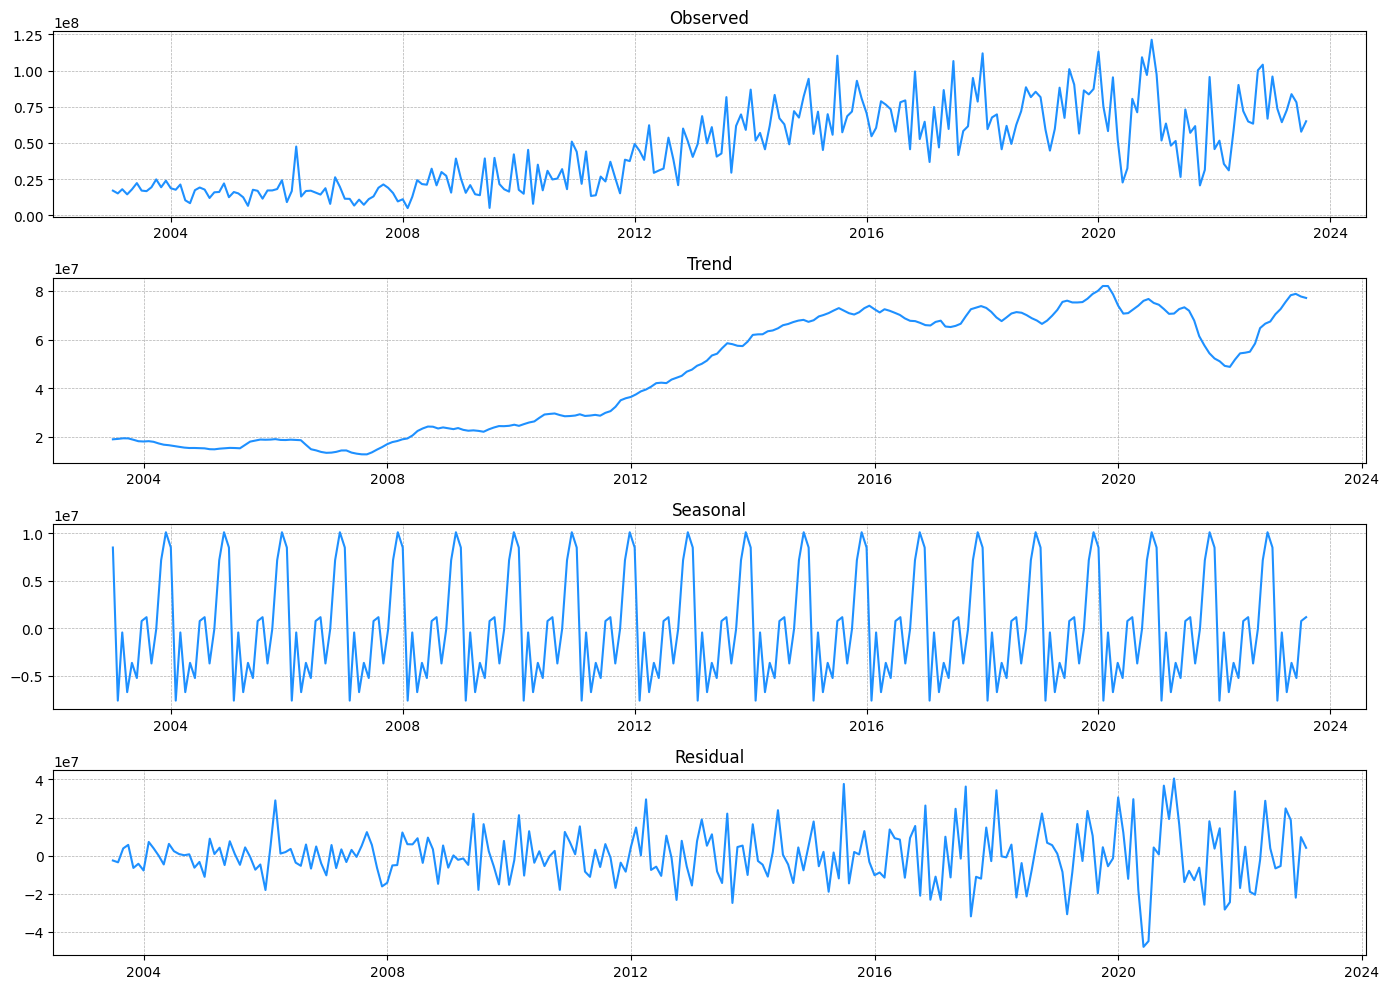

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp2.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp2.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp2.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp2.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Vessel Customs Value (Gen) ($US)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6737.651, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6642.136, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6613.154, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6735.683, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6613.962, Time=0.33 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=6613.443, Time=0.87 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=6614.626, Time=0.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=6612.029, Time=1.49 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=6611.788, Time=4.40 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=6738.484, Time=1.64 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=4.94 sec
 ARIMA

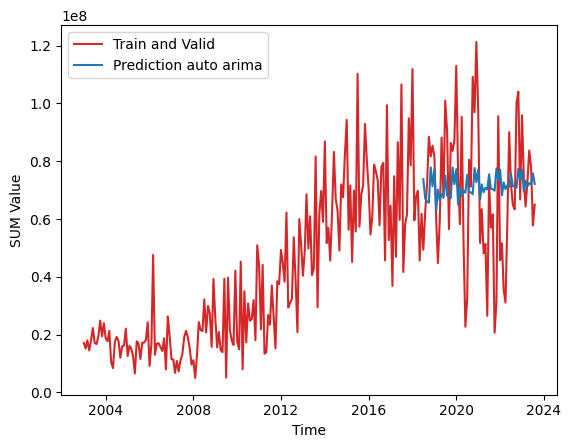

In [ ]:
auto_arima_model(Value_HS87)

Vessel Customs Value (Gen) ($US)
Alpha value from the model is  0.11107142857142857
Beta value from the model is  0.01234126984126984
Gamma value from the model is  0.1646164021164021
MAPE:0.42038280518485693
RMSE:25554936.161699597
MAE:19701143.38511509


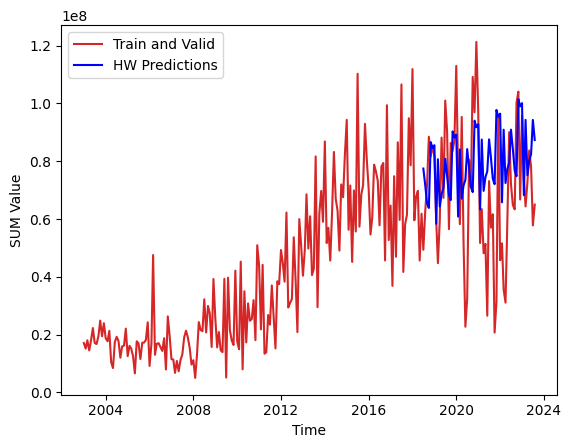

In [ ]:
Holt_Winters(Value_HS87)

# Weight - Time Series

In [ ]:
Weight_HS22 = SUM_weight[['22 Beverages, Spirits And Vinegar']]
Weight_HS22 = Weight_HS22.loc['2015-01-01':]
Weight_HS22

Commodity   22 Beverages, Spirits And Vinegar
Time                                         
2015-01-01                         11197693.0
2015-02-01                         11324540.0
2015-03-01                         13675124.0
2015-04-01                         19134712.0
2015-05-01                         20502318.0
...                                       ...
2023-04-01                          9091357.0
2023-05-01                         11719471.0
2023-06-01                         10524393.0
2023-07-01                          9019337.0
2023-08-01                         12479391.0

[104 rows x 1 columns]

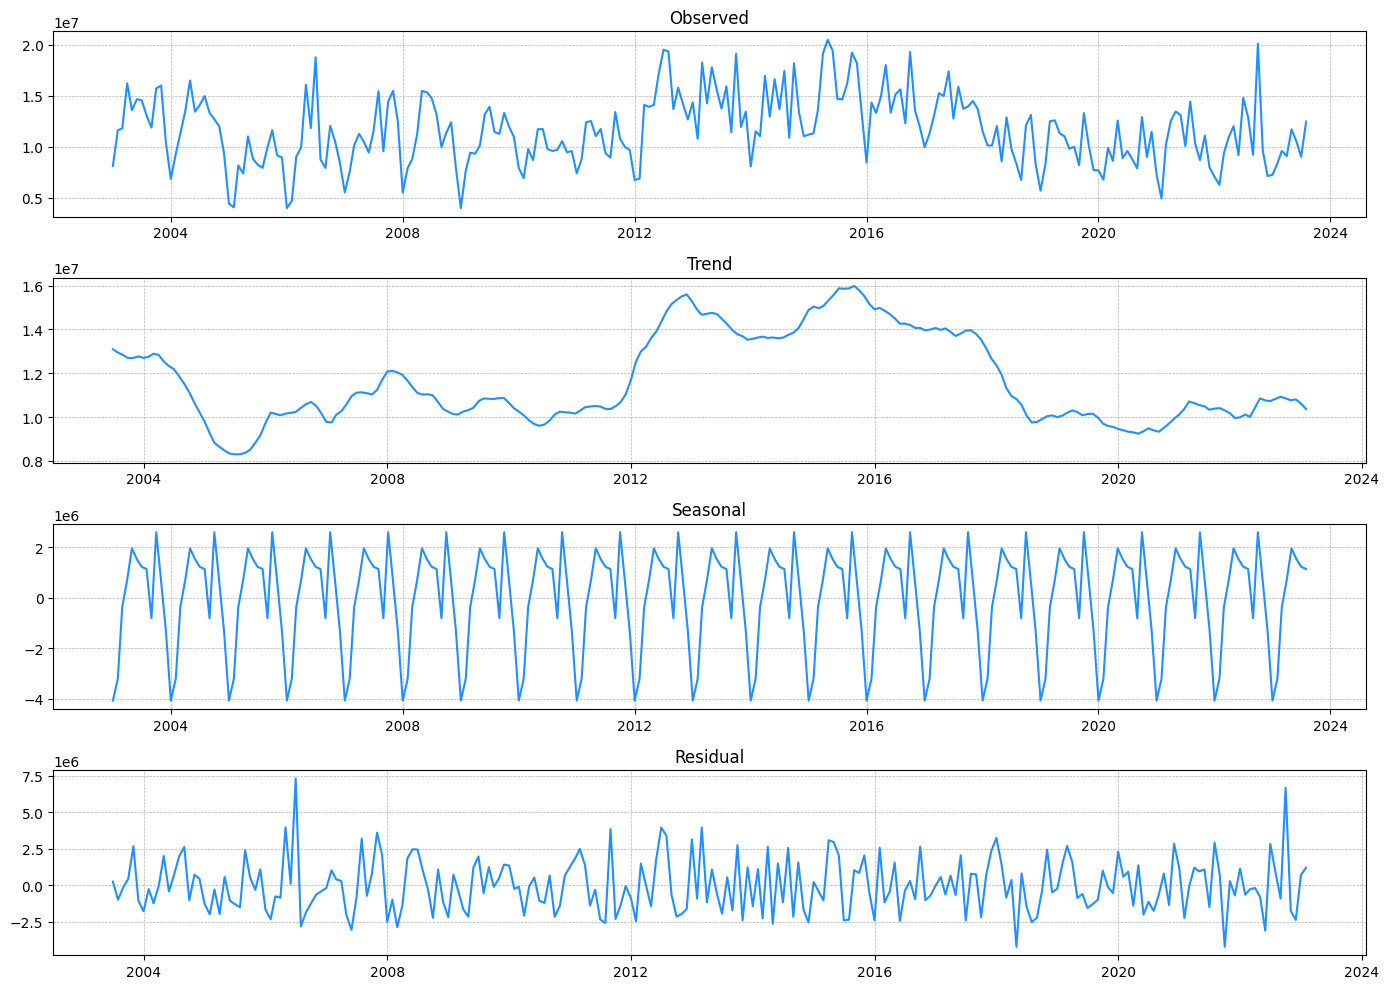

In [ ]:
temp3 = pd.Series(Weight_HS22['22 Beverages, Spirits And Vinegar'].values, index=Weight_HS22.index)
temp3.index.freq = 'MS'
decomp3 = seasonal_decompose(temp3)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp3.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp3.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp3.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp3.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
def auto_arima_model2(df):
  s = df.columns[0]
  print(s)
  y = pd.DataFrame(df[df.columns[0]])

  train,test = train_test_split(y,train_size=0.75,shuffle=False)
  model = auto_arima(train, trace=True, error_action='ignore',
                     suppress_warnings=True, seasonal=True, m=12, stepwise=True)

  fitted_model = model.fit(train)

  start_index = test.index.min()
  end_index = test.index.max()
  forecast = fitted_model.predict(n_periods=len(test))
  forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

  mape = mean_absolute_percentage_error(y[start_index:end_index], forecast)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(y[start_index:end_index], forecast, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(y[start_index:end_index], forecast)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(forecast, label='Prediction auto arima',color='C0')
  plt.xlabel('Time')
  plt.ylabel('Weight')
  plt.legend()
  plt.show()

22 Beverages, Spirits And Vinegar
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2512.031, Time=4.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2518.015, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2512.775, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2512.122, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2516.027, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2517.596, Time=0.96 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2516.382, Time=1.05 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2518.631, Time=6.52 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2518.868, Time=4.95 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2517.810, Time=1.90 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2516.721, Time=5.29 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.55 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2515.080, Time=1.27

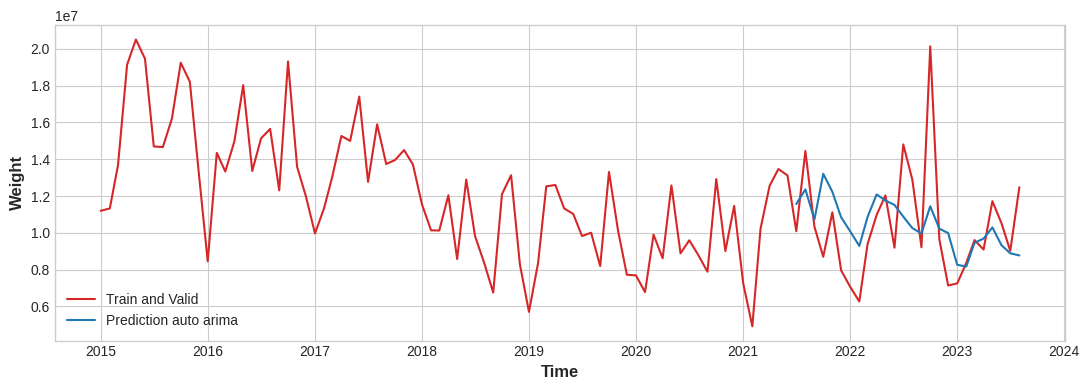

In [ ]:
auto_arima_model2(Weight_HS22)

In [ ]:
def Holt_Winters2(df):
  s = df.columns[0]
  print(s)
  df= df[df[df.columns[0]] != 0]
  y = pd.DataFrame(df[df.columns[0]])
  train,test = train_test_split(y,train_size=0.75,shuffle=False)

  model = ExponentialSmoothing(train, trend='add',seasonal = 'mul', seasonal_periods= 12)
  fitted_model = model.fit()
  print("Alpha value from the model is ", fitted_model.params['smoothing_level'])
  print("Beta value from the model is ", fitted_model.params['smoothing_trend'])
  print("Gamma value from the model is ", fitted_model.params['smoothing_seasonal'])

  y_ses = pd.Series(fitted_model.forecast(len(test)), index=test.index)

  mape = mean_absolute_percentage_error(test, y_ses)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(test, y_ses, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(test, y_ses)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(y_ses, label='HW Predictions',color='blue')
  plt.xlabel('Time')
  plt.ylabel('Weight')
  plt.legend(loc='upper left');
  plt.show()

22 Beverages, Spirits And Vinegar
Alpha value from the model is  0.21714285714285714
Beta value from the model is  0.0167032967032967
Gamma value from the model is  9.999999999999999e-05
MAPE:0.16632602688636353
RMSE:2815268.5233719363
MAE:1925066.862272262


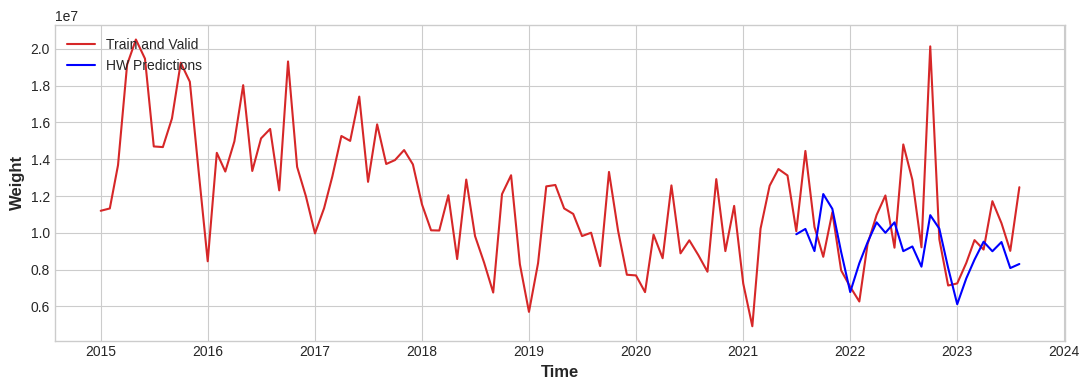

In [ ]:
Holt_Winters2(Weight_HS22)

In [ ]:
HS25 = HS2[HS2['Commodity'] == '25 Salt; Sulfur; Earth & Stone; Lime & Cement Plaster']
Weight_HS25 = pd.DataFrame(HS25.groupby('Time')['Vessel SWT (Gen) (kg)'].sum())
Weight_HS25 = Weight_HS25.resample('MS').sum().fillna(0)
Weight_HS25

Vessel SWT (Gen) (kg)
Time                             
2003-01-01            264473159.0
2003-02-01            261992327.0
2003-03-01            164888757.0
2003-04-01             14047254.0
2003-05-01             32417336.0
...                           ...
2023-04-01             27407008.0
2023-05-01               507538.0
2023-06-01             29194667.0
2023-07-01             28956787.0
2023-08-01             95758589.0

[248 rows x 1 columns]

In [ ]:
Weight_HS25.isna().sum()

Vessel SWT (Gen) (kg)    0
dtype: int64

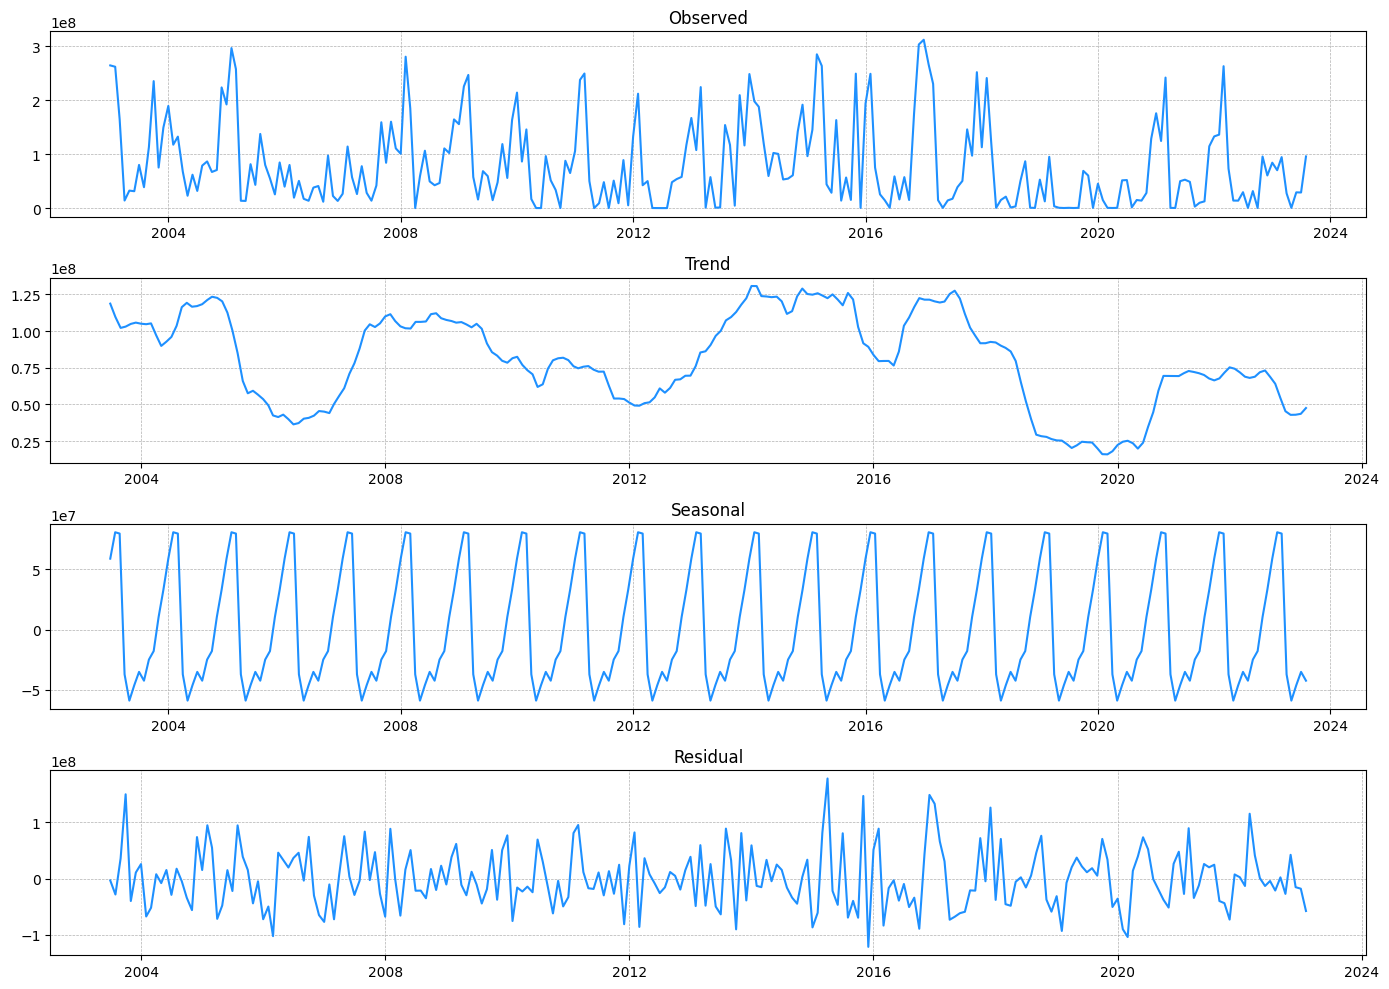

In [ ]:
temp4 = pd.Series(Weight_HS25['Vessel SWT (Gen) (kg)'].values, index=Weight_HS25.index)
temp4.index.freq = 'MS'
decomp4 = seasonal_decompose(temp4)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp4.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp4.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp4.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp4.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Vessel SWT (Gen) (kg)
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=8.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7310.313, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7261.226, Time=0.90 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7269.792, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=7461.696, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=7272.778, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=7260.246, Time=1.07 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=7260.572, Time=0.67 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=7263.224, Time=0.35 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=7300.047, Time=0.46 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=7262.307, Time=1.19 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=7260.684, Time=0.58 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=7270.104, Time=0.71 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=7260.374, Time=2.50 sec
 A

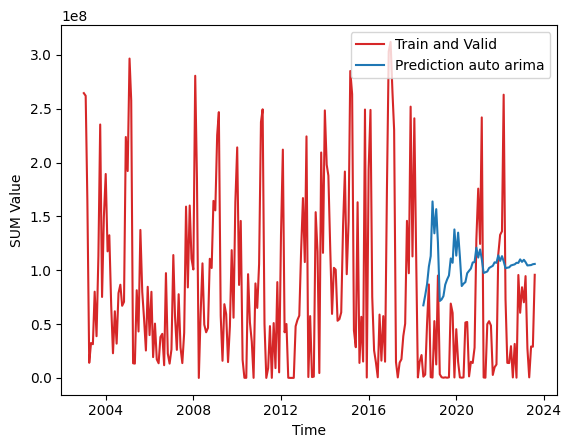

In [ ]:
auto_arima_model(Weight_HS25)

In [ ]:
Weight_HS25 = Weight_HS25.fillna(0)
Weight_HS25.isna().sum()

Vessel SWT (Gen) (kg)    0
dtype: int64

In [ ]:
Weight_HS25 = Weight_HS25.fillna(0)
Holt_Winters(Weight_HS25)

Vessel SWT (Gen) (kg)
Alpha value from the model is  0.14642857142857144
Beta value from the model is  0.013311688311688313
Gamma value from the model is  0.13131868131868132


ValueError: Input contains NaN.

# Origin Countries

In [ ]:
# Most Value Region
top5_value_CO = HS2.groupby('Country')['Customs Containerized Vessel Value (Gen) ($US)'].sum().nlargest(5).index
filtered_CO = HS2[HS2['Country'].isin(top5_value_CO)]
SUM_values_CO = filtered_CO.groupby(['Time','Country'])['Customs Containerized Vessel Value (Gen) ($US)'].sum().unstack()

In [ ]:
SUM_values_CO.fillna(0)

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for country in SUM_values_CO.columns:
  plt.plot(SUM_values_CO.index, SUM_values_CO[country], label=f'{country}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Most Weigth Region
top5_WGT_CO = HS2.groupby('Country')['Containerized Vessel SWT (Gen) (kg)'].sum().nlargest(5).index
filtered_WGT_CO = HS2[HS2['Country'].isin(top5_WGT_CO)]
SUM_WGT_CO = filtered_WGT_CO.groupby(['Time','Country'])['Containerized Vessel SWT (Gen) (kg)'].sum().unstack()

In [ ]:
SUM_WGT_CO

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for country in SUM_WGT_CO.columns:
  plt.plot(SUM_WGT_CO.index, SUM_WGT_CO[country], label=f'{country}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

In [ ]:
EU = HS2[HS2['Country'] == 'Europe']
EU

In [ ]:
top5_EU_WGT = EU.groupby('Commodity')['Containerized Vessel SWT (Gen) (kg)'].sum().nlargest(5).index
filtered_EU_WGT = EU[EU['Commodity'].isin(top5_EU_WGT)]
SUM_WGT_EU = filtered_EU_WGT.groupby(['Time','Commodity'])['Containerized Vessel SWT (Gen) (kg)'].sum().unstack()
SUM_WGT_EU.fillna(0)

In [ ]:
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,8))

for commodity in SUM_WGT_EU.columns:
  plt.plot(SUM_WGT_EU.index, SUM_WGT_EU[commodity], label=f'Commodity {commodity}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

In [ ]:
HS27_Country = HS27.groupby(['Time','Country'])['Vessel Customs Value (Gen) ($US)'].sum()
HS27_Country = HS27_Country.reset_index()
pivot_df = HS27_Country.pivot(index='Time',columns='Country',values='Vessel Customs Value (Gen) ($US)')
pivot_df = pivot_df.fillna(0)
pivot_df

In [ ]:
# Value - Country for Commodity 27
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,8))

for country in pivot_df.columns:
  plt.plot(pivot_df.index, pivot_df[country], label=f'Country {country}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Weight - Country for HS27
HS27_WGT_COO = HS27.groupby(['Time','Country'])['Vessel SWT (Gen) (kg)'].sum()
HS27_WGT_COO = HS27_WGT_COO.reset_index()
pivot_WGT = HS27_WGT_COO.pivot(index='Time',columns='Country',values='Vessel SWT (Gen) (kg)')
pivot_WGT = pivot_WGT.fillna(0)
pivot_WGT

In [ ]:
plt.figure(figsize=(15,8))

for country in pivot_WGT.columns:
  plt.plot(pivot_WGT.index, pivot_WGT[country], label=f'Country {country}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

# HS4

In [ ]:
df = pd.read_csv('boston_census_hs4_v2.csv')

In [ ]:
df.info()
df

In [ ]:
df['I_COMMODITY'] = df['I_COMMODITY'].astype(str).str.zfill(4)
df

In [ ]:
df['time'] = pd.to_datetime(df['YEAR'].astype(str)+'-'+df['MONTH'].astype(str))
df

In [ ]:
df.isna().sum()

In [ ]:
top5value_HS4 = df.groupby('I_COMMODITY')['CNT_VAL_MO'].sum().nlargest(5).index
top5value_HS4

In [ ]:
filtered_HS4 = df[df['I_COMMODITY'].isin(top5value_HS4)]
filtered_HS4

In [ ]:
HS4_values = filtered_HS4.groupby(['time','I_COMMODITY'])['CNT_VAL_MO'].sum().unstack()
HS4_values = HS4_values.fillna(0)
HS4_values

In [ ]:
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,6))

for commodity in HS4_values.columns:
  plt.plot(HS4_values.index, HS4_values[commodity], label=f'Commodity {commodity}',color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
filtered_HS4_2 = filtered_HS4[filtered_HS4['CTY_CODE'] == '-']
filtered_HS4_2

In [ ]:
HS4_values_2 = filtered_HS4_2.groupby(['time','I_COMMODITY'])['CNT_VAL_MO'].sum().unstack()
HS4_values_2 = HS4_values_2.fillna(0)
HS4_values_2

In [ ]:
plt.figure(figsize=(15,6))

for commodity in HS4_values_2.columns:
  plt.plot(HS4_values_2.index, HS4_values_2[commodity], label=f'Commodity {commodity}',color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Commodities.ipynb

# SCM 256

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from warnings import simplefilter

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess

In [25]:
df = pd.read_excel('https://www.dropbox.com/scl/fi/kpm55wa4tebambwtvjwtw/Massport_monthly_HS_2-digit_Import_2003-2023_by_Region.xlsx?rlkey=zhpsqk7micnplcl0xj9i76xjn&dl=1')
df

Port                                    Commodity  \
0      Boston, MA (Port)                02 Meat And Edible Meat Offal   
1      Boston, MA (Port)                02 Meat And Edible Meat Offal   
2      Boston, MA (Port)                02 Meat And Edible Meat Offal   
3      Boston, MA (Port)                02 Meat And Edible Meat Offal   
4      Boston, MA (Port)                02 Meat And Edible Meat Offal   
...                  ...                                          ...   
52013  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52014  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52015  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52016  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   
52017  Boston, MA (Port)  98 Special Classification Provisions, Nesoi   

             Country       Time  Customs Value (Gen) ($US)  \
0       Asia - Other 2003-01-01                       1926   
1       Asia - Other 2003-03-01                        995   
2       Asia - Other 2003-04-01                        995   
3       Asia - Other 2003-05-01                        921   
4       Asia - Other 2003-06-01                       7302   
...              ...        ...                        ...   
52013  South America 2012-12-01                    3158065   
52014  South America 2017-10-01                         20   
52015  South America 2018-11-01                         48   
52016  South America 2019-11-01                      48743   
52017  South America 2020-09-01                      56549   

       Vessel Customs Value (Gen) ($US)  \
0                                1926.0   
1                                 995.0   
2                                 995.0   
3                                 921.0   
4                                7302.0   
...                                 ...   
52013                         3158065.0   
52014                              20.0   
52015                              48.0   
52016                           48743.0   
52017                           56549.0   

       Customs Containerized Vessel Value (Gen) ($US)  Vessel SWT (Gen) (kg)  \
0                                              1926.0                 4195.0   
1                                               995.0                19686.0   
2                                               995.0                19686.0   
3                                               921.0                20975.0   
4                                              7302.0                  195.0   
...                                               ...                    ...   
52013                                             NaN                63161.0   
52014                                             NaN                  262.0   
52015                                            48.0                 2603.0   
52016                                         48743.0                11745.0   
52017                                         56549.0                22598.0   

       Containerized Vessel SWT (Gen) (kg)  
0                                   4195.0  
1                                  19686.0  
2                                  19686.0  
3                                  20975.0  
4                                    195.0  
...                                    ...  
52013                                  NaN  
52014                                  NaN  
52015                               2603.0  
52016                              11745.0  
52017                              22598.0  

[52018 rows x 9 columns]

In [36]:
df[['Country','Containerized Vessel SWT (Gen) (kg)']].groupby('Country').sum('Containerized Vessel SWT (Gen) (kg)').sort_values('Containerized Vessel SWT (Gen) (kg)', ascending=False)

Containerized Vessel SWT (Gen) (kg)
Country                                                           
Europe                                                8.416611e+09
Asia - Other                                          8.301257e+09
North America                                         1.251480e+09
South America                                         5.683104e+08
Asia - South                                          4.749072e+08
Africa                                                4.645517e+08
Central America and Caribbean                         1.956855e+08
Asia Near East                                        1.871103e+08
Australia and Oceania                                 1.492854e+08

In [27]:
df_Europe = df[df['Country']=='Europe']
df_EU_WGT = df_Europe[['Time','Containerized Vessel SWT (Gen) (kg)']].groupby('Time').sum()

In [30]:
df_EU_WGT['Month'] = np.arange(0, len(df_EU_WGT.index))
df_EU_WGT

Containerized Vessel SWT (Gen) (kg)  Month
Time                                                  
2003-01-01                           24489146.0      0
2003-02-01                           27762677.0      1
2003-03-01                           29891232.0      2
2003-04-01                           34292953.0      3
2003-05-01                           33058055.0      4
...                                         ...    ...
2023-04-01                           23539333.0    243
2023-05-01                           25162009.0    244
2023-06-01                           29515536.0    245
2023-07-01                           27548113.0    246
2023-08-01                           50233486.0    247

[248 rows x 2 columns]

In [29]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Month', 'Containerized Vessel SWT (Gen) (kg)', data=df_EU_WGT, color='0.75')
ax = sns.regplot(x='Month', y='Containerized Vessel SWT (Gen) (kg)', data=df_EU_WGT, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Monthly Containerized Vessel SWT (Gen) (kg) imported from Asia-Other');

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [31]:
df_AsiaOther = df[df['Country']=='Asia - Other']
df_AO_WGT = df_AsiaOther[['Time','Containerized Vessel SWT (Gen) (kg)']].groupby('Time').sum()

In [32]:
df_AO_WGT['Month'] = np.arange(0, len(df_AO_WGT.index))
df_AO_WGT

Containerized Vessel SWT (Gen) (kg)  Month
Time                                                  
2003-01-01                           13495966.0      0
2003-02-01                           11112354.0      1
2003-03-01                            8955270.0      2
2003-04-01                            9369787.0      3
2003-05-01                            6439287.0      4
...                                         ...    ...
2023-04-01                           43651626.0    243
2023-05-01                           52837786.0    244
2023-06-01                           29636132.0    245
2023-07-01                           50969450.0    246
2023-08-01                           56136356.0    247

[248 rows x 2 columns]

In [33]:
X = df_AO_WGT.loc[:, ['Month']]  # features
y = df_AO_WGT.loc[:, 'Containerized Vessel SWT (Gen) (kg)']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [34]:
model.coef_

array([102517.47569985])

In [35]:
model.intercept_

20811903.83977846

In [ ]:
simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Containerized Weight(kg) from Asia-Other');

In [ ]:
df_AO_WGT['Lag_1'] = df_AO_WGT['Containerized Vessel SWT (Gen) (kg)'].shift(1)

df_AO_WGT.head()

In [ ]:
X = df_AO_WGT.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df_AO_WGT.loc[:, 'Containerized Vessel SWT (Gen) (kg)']
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Containerized Vessel SWT (Gen) (kg)')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Containerized Weight(kg) from Asia-Other');

There seems to be a lag affection. I also ran the data from Europe, not so significant.

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [ ]:
df_AO_WGT_MA = df_AO_WGT[['Containerized Vessel SWT (Gen) (kg)']]

In [ ]:
moving_average = df_AO_WGT_MA.rolling(
    window=12,
    center=True,      # puts the average at the center of the window
    min_periods=6,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_AO_WGT_MA.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Asia-Other Containerized Weight(kg): 12-Month Moving Average", legend=False,
);

In [ ]:
dp = DeterministicProcess(
    index=df_AO_WGT_MA.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

In [ ]:
y = df_AO_WGT_MA["Containerized Vessel SWT (Gen) (kg)"]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
y_pred.tail(5)

In [ ]:
ax = df_AO_WGT_MA.plot(style=".", color="0.5", title="Monthly Containerized Weight(kg) from Asia-Other - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [ ]:
X = dp.out_of_sample(steps=16)

y_fore = pd.Series(model.predict(X), index=X.index).to_frame('Containerized Vessel SWT (Gen) (kg)').reset_index()
#Set date as index for predictions
def add_timeindex(row):
    return pd.to_datetime('2002-12-01') + pd.DateOffset(months=row['index'])
y_fore['Month'] = y_fore.apply(add_timeindex,axis=1)
y_fore = y_fore.set_index('Month').drop('index',axis=1)

y_fore.head()

In [ ]:
ax = df_AO_WGT_MA["2003-01-01":].plot(title="Monthly Weight(kg) from EU - Linear Trend Forecast", **plot_params)
ax = y_pred["2003-01-01":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess


#Configure plot styles

import warnings

import matplotlib.pyplot as plt
from IPython import get_ipython

warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

get_ipython().config.InlineBackend.figure_format = 'retina'


#Plot seasonality of data
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette(
        "husl",
        n_colors=X[period].nunique(),
    )
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax

#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [ ]:
X = df_AO_WGT_MA.copy()

X["month"] = X.index.month  # the x-axis (freq)
X["year"] = X.index.year  # the seasonal period (period)

#X["week"] = X.index.week
#X["quarter"] = X.index.quarter

fig, ax = plt.subplots(1, 1, figsize=(11, 6))
seasonal_plot(X, y="Containerized Vessel SWT (Gen) (kg)", period="year", freq="month", ax=ax)

In [ ]:
plot_periodogram(df_AO_WGT_MA["Containerized Vessel SWT (Gen) (kg)"]);

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

data = df_AO_WGT_MA.to_period('M')

dp = DeterministicProcess(
    index=data.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for weeks

In [ ]:
y = df_AO_WGT_MA["Containerized Vessel SWT (Gen) (kg)"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=16) #index in number, not future time periods
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Monthly Weight(kg) - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

# accurate forecasts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

import warnings

import matplotlib.pyplot as plt
from IPython import get_ipython

warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

get_ipython().config.InlineBackend.figure_format = 'retina'


#Plot seasonality of data
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette(
        "husl",
        n_colors=X[period].nunique(),
    )
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax

#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [ ]:
df2 = pd.read_excel('https://www.dropbox.com/scl/fi/kpm55wa4tebambwtvjwtw/Massport_monthly_HS_2-digit_Import_2003-2023_by_Region.xlsx?rlkey=zhpsqk7micnplcl0xj9i76xjn&dl=1',
    usecols=['Commodity', 'Country', 'Time', 'Customs Containerized Vessel Value (Gen) ($US)', 'Containerized Vessel SWT (Gen) (kg)'],
    dtype={
        'Commodity': 'category',
        'Country': 'category',
        'Customs Containerized Vessel Value (Gen) ($US)': 'float',
        'Containerized Vessel SWT (Gen) (kg)': 'float',
    },
    parse_dates=['Time'])
#Convert days to period type.
df2['Time'] = df2['Time'].dt.to_period('M')
df2_AO = df2[df2['Country']=='Asia - Other']
#Set index of dataframe sorted by store_nbr, product-family-id and the date.
df2_AO = df2_AO.set_index(['Country', 'Commodity', 'Time']).sort_index()
df2_AO.head(5)

In [ ]:
commodity_AO = (
    df2_AO
    .groupby(['Commodity', 'Time']).sum()
    .unstack('Commodity')
)
commodity_AO.head(5)

In [ ]:
df2_AO_sum = (
    df2_AO
    .groupby('Time').sum()
)
df2_AO_sum.head(5)

In [ ]:
COM_22 = commodity_AO.loc(axis=1)[:, '22 Beverages, Spirits And Vinegar']
y = COM_22.loc[:, 'Containerized Vessel SWT (Gen) (kg)'].squeeze() #Squeeze data from data-frame into pandas series.
y

In [ ]:
y.plot.line()

In [ ]:
fourier = CalendarFourier(freq='Y',order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for new years day.
X_time['NewYearsMonth'] = (X_time.index.month == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'weight_deseasoned'

ax = y_deseason.plot()
ax.set_title("Weight of 22 Beverage (deseasonalized)");

In [ ]:
y_ma = y.rolling(
    window=12,
    center=True,
).mean()

# Plot
ax = y_ma.plot()
ax.set_title("12-Month Moving Average");

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.seasonal import seasonal_decompose

from xgboost import XGBRegressor

import warnings
warnings.simplefilter("ignore")

from IPython import get_ipython
get_ipython().config.InlineBackend.figure_format = 'retina'

#Configure plot styles

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


In [ ]:
# Define lag plot
def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax

In [ ]:
#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

In [ ]:
plot_acf(y_deseason, lags=12);

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=3);

# BoostedHybrid

In [ ]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2 # Model 2 trains on the residuals of the forecast of model_1
        self.y_columns = None  # store column names from fit method


    def fit(self, X_1, X_2, y):
        # Train model_1
        self.model_1.fit(X_1, y)

        # Make predictions
        y_fit = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        # Compute residuals
        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        # Train model_2 on residuals
        self.model_2.fit(X_2, y_resid)

        # Save column names for predict method
        self.y_columns = y.columns

        self.y_fit = y_fit
        self.y_resid = y_resid

    def predict(self, X_1, X_2):
        # Predict with model_1
        y_pred = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        # Add model_2 predictions to model_1 predictions
        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()

In [ ]:
y = commodity_AO.loc[:, 'Containerized Vessel SWT (Gen) (kg)']
y

In [ ]:
y['22 Beverages, Spirits And Vinegar']

In [ ]:
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

X_1

In [ ]:
X_2 = commodity_AO.drop('Customs Containerized Vessel Value (Gen) ($US)',axis=1).stack()
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns='Containerized Vessel SWT (Gen) (kg)',inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 11) | (X_2['Month'] == 12), '1', '0')
X_2

In [ ]:
model = BoostedHybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
def plot_model_results(model):
    y_train, y_valid = y[:"2020-06"], y["2020-07":]
    X1_train, X1_valid = X_1[:"2020-06"], X_1["2020-07":]
    X2_train, X2_valid = X_2.loc[:"2020-06"], X_2.loc["2020-07":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    commodity = y.columns[20:21]
    axs = y.loc(axis=1)[commodity].plot(
        subplots=True, sharex=True, figsize=(11, 5), **plot_params, alpha=0.5,
    )
    _ = y_fit.loc(axis=1)[commodity].plot(subplots=True, sharex=True, color='C0', ax=axs)
    _ = y_pred.loc(axis=1)[commodity].plot(subplots=True, sharex=True, color='C3', ax=axs)
    for ax, family in zip(axs, commodity):
        ax.legend([])
        ax.set_ylabel(family)
plot_model_results(model)

In [ ]:
# NO other variables, maybe need economic variables

# SCM256 NEW

## Setting up workplace

In [23]:
# Setup notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.seasonal import seasonal_decompose

from xgboost import XGBRegressor

import warnings
warnings.simplefilter("ignore")

from IPython import get_ipython
get_ipython().config.InlineBackend.figure_format = 'retina'

#Configure plot styles

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


ModuleNotFoundError: No module named 'xgboost'

## Defining Plots

In [ ]:
# Define lag plot
def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax


In [ ]:
#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

## Value - time series as features

In [ ]:
SUM_values['84Nuclear_39Plastics'] = SUM_values['39 Plastics And Articles Thereof']+SUM_values['84 Nuclear Reactors, Boilers, Machinery Etc.; Parts']

In [ ]:
top_value = SUM_values['03 Fish, Crustaceans & Aquatic Invertebrates']
top_value = top_value[top_value.index > pd.Timestamp('2014-12-01')]
y = top_value.loc[:].squeeze() #Squeeze data from data-frame into pandas series.
y

Time
2015-01-01    50143258.0
2015-02-01    45521826.0
2015-03-01    38610524.0
2015-04-01    11313390.0
2015-05-01    21925023.0
                 ...    
2023-04-01    25437932.0
2023-05-01    34502535.0
2023-06-01    27687079.0
2023-07-01    32756416.0
2023-08-01    35324050.0
Name: 03 Fish, Crustaceans & Aquatic Invertebrates, Length: 104, dtype: float64

<Axes: xlabel='Time'>

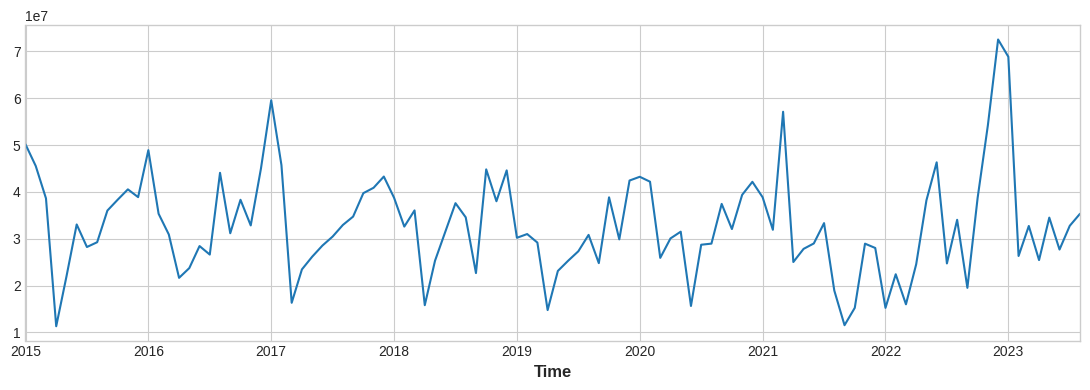

In [ ]:
y.plot.line()

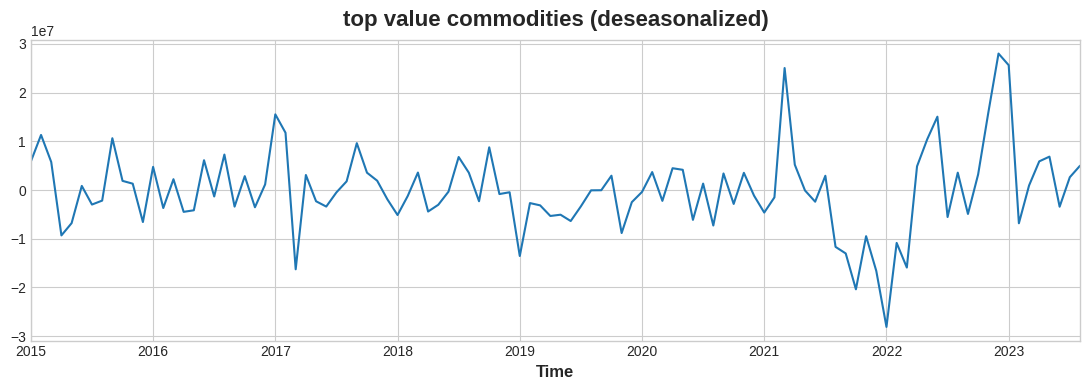

In [ ]:
# Monthly basis per year
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for Christmas.
X_time['Christmas'] = (X_time.index.month.isin([9, 10, 11]))

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'value_deseasoned'

ax = y_deseason.plot()
ax.set_title("top value commodities (deseasonalized)");

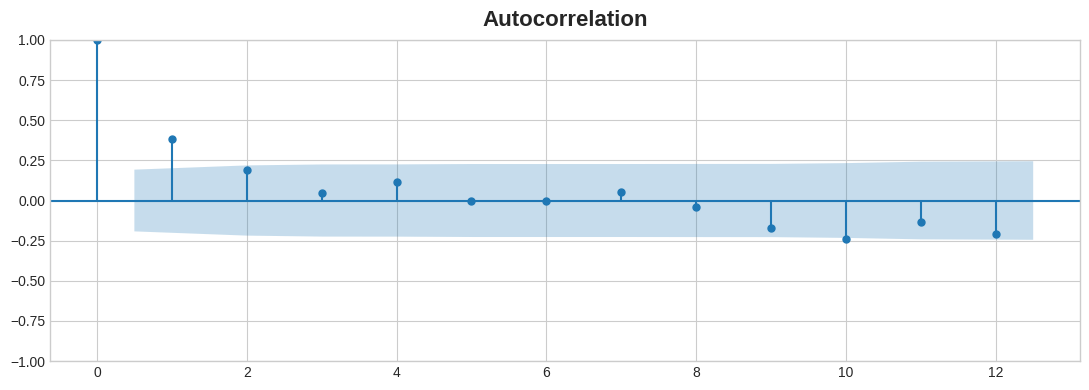

In [ ]:
plot_acf(y_deseason, lags=12);

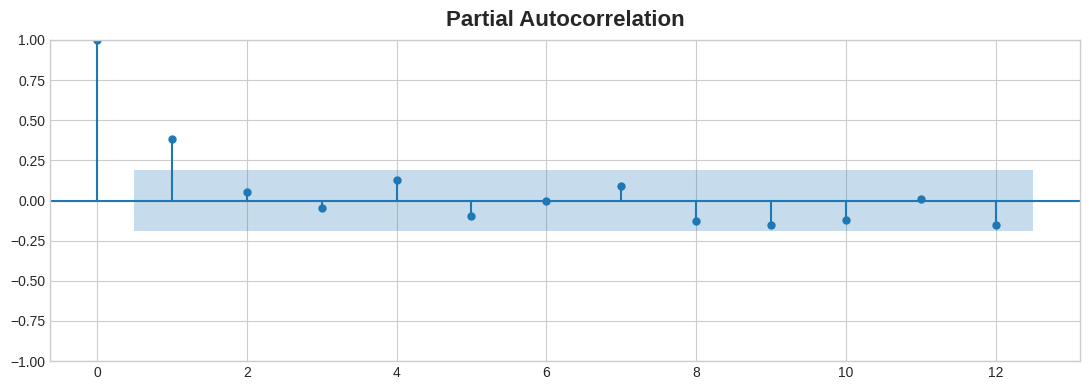

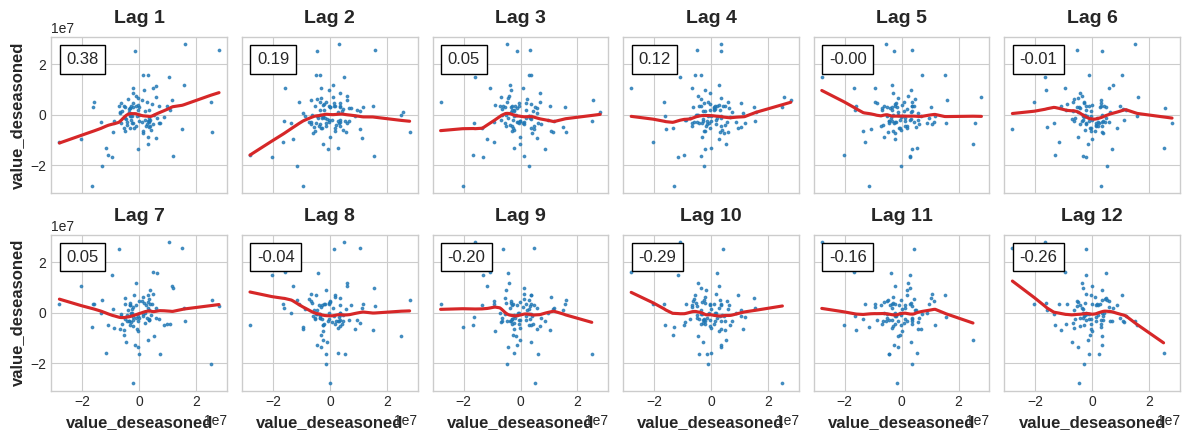

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=2);

In [ ]:
# create dataframe with n='lags' lags with 'lag_time' and prefixed by 'name'
def make_lags(ts, lags, lag_time=1, name='y'):
    return pd.concat(
        {f'{name}_lag_{i}': ts.shift(i)
         for i in range(lag_time, lags + lag_time)},
        axis=1)

X_lags = make_lags(y_deseason, lags=1, name='y_deseason')

X = pd.concat([X_time, X_lags], axis=1).dropna()

# align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
y, X = y.align(X, join='inner')

In [ ]:
X

const  trend  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  \
Time                                                                    
2015-02-01    1.0    2.0      1.0      0.0      0.0      0.0      0.0   
2015-03-01    1.0    3.0      0.0      1.0      0.0      0.0      0.0   
2015-04-01    1.0    4.0      0.0      0.0      1.0      0.0      0.0   
2015-05-01    1.0    5.0      0.0      0.0      0.0      1.0      0.0   
2015-06-01    1.0    6.0      0.0      0.0      0.0      0.0      1.0   
...           ...    ...      ...      ...      ...      ...      ...   
2023-04-01    1.0  100.0      0.0      0.0      1.0      0.0      0.0   
2023-05-01    1.0  101.0      0.0      0.0      0.0      1.0      0.0   
2023-06-01    1.0  102.0      0.0      0.0      0.0      0.0      1.0   
2023-07-01    1.0  103.0      0.0      0.0      0.0      0.0      0.0   
2023-08-01    1.0  104.0      0.0      0.0      0.0      0.0      0.0   

            s(7,12)  s(8,12)  s(9,12)  ...  cos(2,freq=A-DEC)  \
Time                                   ...                      
2015-02-01      0.0      0.0      0.0  ...           0.482508   
2015-03-01      0.0      0.0      0.0  ...          -0.444378   
2015-04-01      0.0      0.0      0.0  ...          -0.999074   
2015-05-01      0.0      0.0      0.0  ...          -0.548843   
2015-06-01      0.0      0.0      0.0  ...           0.467359   
...             ...      ...      ...  ...                ...   
2023-04-01      0.0      0.0      0.0  ...          -0.999074   
2023-05-01      0.0      0.0      0.0  ...          -0.548843   
2023-06-01      0.0      0.0      0.0  ...           0.467359   
2023-07-01      1.0      0.0      0.0  ...           0.998667   
2023-08-01      0.0      1.0      0.0  ...           0.527078   

            sin(3,freq=A-DEC)  cos(3,freq=A-DEC)  sin(4,freq=A-DEC)  \
Time                                                                  
2015-02-01           0.999546          -0.030120           0.845249   
2015-03-01           0.094537          -0.995521          -0.796183   
2015-04-01          -0.997917          -0.064508          -0.085965   
2015-05-01          -0.085965           0.996298           0.917584   
2015-06-01           0.998435           0.055917          -0.826354   
...                       ...                ...                ...   
2023-04-01          -0.997917          -0.064508          -0.085965   
2023-05-01          -0.085965           0.996298           0.917584   
2023-06-01           0.998435           0.055917          -0.826354   
2023-07-01           0.077386          -0.997001          -0.103102   
2023-08-01          -0.998880          -0.047321           0.895839   

            cos(4,freq=A-DEC)  sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  \
Time                                                                  
2015-02-01          -0.534373           0.455907          -0.890028   
2015-03-01          -0.605056          -0.933837           0.357698   
2015-04-01           0.996298           0.994218           0.107381   
2015-05-01          -0.397543          -0.785650          -0.618671   
2015-06-01          -0.563151           0.417194           0.908818   
...                       ...                ...                ...   
2023-04-01           0.996298           0.994218           0.107381   
2023-05-01          -0.397543          -0.785650          -0.618671   
2023-06-01          -0.563151           0.417194           0.908818   
2023-07-01           0.994671           0.128748          -0.991677   
2023-08-01          -0.444378          -0.566702           0.823923   

            sin(6,freq=A-DEC)  Christmas  y_deseason_lag_1  
Time                                                        
2015-02-01          -0.060213      False      5.862728e+06  
2015-03-01          -0.188227      False      1.131111e+07  
2015-04-01           0.128748      False      5.752697e+06  
2015-05-01          -0.171293      False     -9.315281e+06  
20

Training RMSE: 6286089.40615
Validation RMSE: 14145470.81314
Training MAPE %: 17.25219
Validation MAPE %: 39.07228


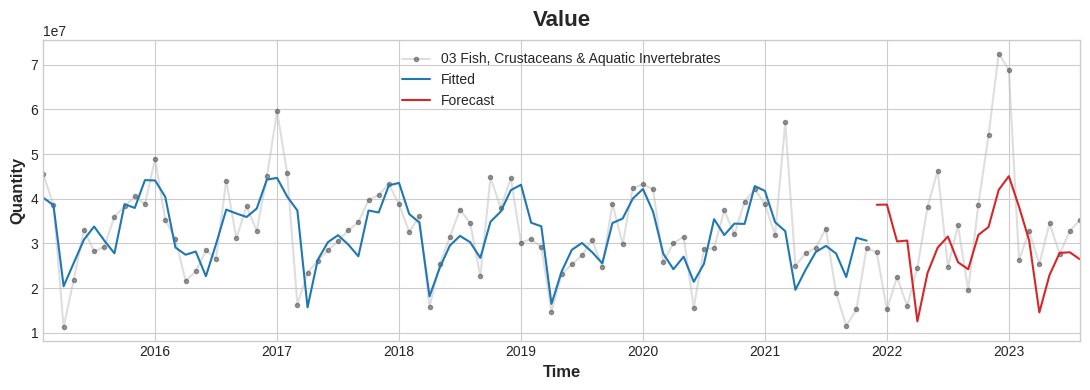

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index=X_train.index).clip(0.0) #.clip(0.0) removes negative values
y_pred = pd.Series(model.predict(X_valid), index=X_valid.index).clip(0.0) #.clip(0.0) removes negative values

rmse_train = mean_squared_error(y_train, y_fit, squared=False)
rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
mape_train = mean_absolute_percentage_error(y_train, y_fit) * 100
mape_valid = mean_absolute_percentage_error(y_valid, y_pred) * 100
print(f'Training RMSE: {rmse_train:.5f}')
print(f'Validation RMSE: {rmse_valid:.5f}')
print(f'Training MAPE %: {mape_train:.5f}')
print(f'Validation MAPE %: {mape_valid:.5f}')

ax = y.plot(**plot_params, alpha=0.5, title="Value", ylabel="Quantity")
ax = y_fit.plot(ax=ax, label="Fitted", color='C0')
ax = y_pred.plot(ax=ax, label="Forecast", color='C3')
ax.legend();

## Boosted Hybrid again

In [ ]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2 # Model 2 trains on the residuals of the forecast of model_1
        self.y_columns = None  # store column names from fit method


    def fit(self, X_1, X_2, y):
        # Train model_1
        self.model_1.fit(X_1, y)

        # Make predictions
        y_fit = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        # Compute residuals
        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        # Train model_2 on residuals
        self.model_2.fit(X_2, y_resid)

        # Save column names for predict method
        self.y_columns = y.columns

        self.y_fit = y_fit
        self.y_resid = y_resid

    def predict(self, X_1, X_2):
        # Predict with model_1
        y_pred = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        # Add model_2 predictions to model_1 predictions
        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()



In [ ]:
y = SUM_values
y = y.loc['2015-02-01':]
y

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2015-02-01                                    45521826.0   
2015-03-01                                    38610524.0   
2015-04-01                                    11313390.0   
2015-05-01                                    21925023.0   
2015-06-01                                    33038736.0   
...                                                  ...   
2023-04-01                                    25437932.0   
2023-05-01                                    34502535.0   
2023-06-01                                    27687079.0   
2023-07-01                                    32756416.0   
2023-08-01                                    35324050.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2015-02-01                         24794845.0   
2015-03-01                         38568001.0   
2015-04-01                         40693359.0   
2015-05-01                         49741833.0   
2015-06-01                         51686150.0   
...                                       ...   
2023-04-01                         33497739.0   
2023-05-01                         40384107.0   
2023-06-01                         39033801.0   
2023-07-01                         29772975.0   
2023-08-01                         40149868.0   

Commodity   39 Plastics And Articles Thereof  \
Time                                           
2015-02-01                        15366101.0   
2015-03-01                        19570948.0   
2015-04-01                        17498689.0   
2015-05-01                        15563745.0   
2015-06-01                        17473478.0   
...                                      ...   
2023-04-01                        22052627.0   
2023-05-01                        25727748.0   
2023-06-01                        15645296.0   
2023-07-01                        20190060.0   
2023-08-01                        26999655.0   

Commodity   84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Time                                                              
2015-02-01                                         47600211.0     
2015-03-01                                         54202863.0     
2015-04-01                                         46464496.0     
2015-05-01                                         54036648.0     
2015-06-01                                         46654430.0     
...                                                       ...     
2023-04-01                                         53330039.0     
2023-05-01                                         64351866.0     
2023-06-01                                         53942981.0     
2023-07-01                                         52292641.0     
2023-08-01                                         76513296.0     

Commodity   85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Time                                                               
2015-02-01                                         16351068.0      
2015-03-01                                         18929609.0      
2015-04-01                                         15886178.0      
2015-05-01                                         18698092.0      
2015-06-01                                         22099165.0      
...                                                       ...      
2023-04-01                                         26138936.0      
2023-05-01                                         23862168.0      
2023-06-01                                         15986702.0      
2023-07-01                                         31984723.0      
2023-08-01                                         27236561.0      

[103 rows x 5 columns]

In [ ]:
X_1 = X
new_index = pd.to_datetime(['2015-01-01'])
new_rows = pd.DataFrame(index=new_index, columns=X_1.columns)
new_rows.loc[:] = 0
new_rows.loc['2015-01-01', 'trend'] = 1
X_1 = pd.concat([X_1, new_rows]).sort_index()
X_1 = X_1.drop(X_1.index[0])

X_1

const  trend s(2,12) s(3,12) s(4,12) s(5,12) s(6,12) s(7,12)  \
2015-02-01   1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2015-03-01   1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2015-04-01   1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2015-05-01   1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   
2015-06-01   1.0    6.0     0.0     0.0     0.0     0.0     1.0     0.0   
...          ...    ...     ...     ...     ...     ...     ...     ...   
2023-04-01   1.0  100.0     0.0     0.0     1.0     0.0     0.0     0.0   
2023-05-01   1.0  101.0     0.0     0.0     0.0     1.0     0.0     0.0   
2023-06-01   1.0  102.0     0.0     0.0     0.0     0.0     1.0     0.0   
2023-07-01   1.0  103.0     0.0     0.0     0.0     0.0     0.0     1.0   
2023-08-01   1.0  104.0     0.0     0.0     0.0     0.0     0.0     0.0   

           s(8,12) s(9,12)  ... cos(2,freq=A-DEC) sin(3,freq=A-DEC)  \
2015-02-01     0.0     0.0  ...          0.482508          0.999546   
2015-03-01     0.0     0.0  ...         -0.444378          0.094537   
2015-04-01     0.0     0.0  ...         -0.999074         -0.997917   
2015-05-01     0.0     0.0  ...         -0.548843         -0.085965   
2015-06-01     0.0     0.0  ...          0.467359          0.998435   
...            ...     ...  ...               ...               ...   
2023-04-01     0.0     0.0  ...         -0.999074         -0.997917   
2023-05-01     0.0     0.0  ...         -0.548843         -0.085965   
2023-06-01     0.0     0.0  ...          0.467359          0.998435   
2023-07-01     0.0     0.0  ...          0.998667          0.077386   
2023-08-01     1.0     0.0  ...          0.527078          -0.99888   

           cos(3,freq=A-DEC) sin(4,freq=A-DEC) cos(4,freq=A-DEC)  \
2015-02-01          -0.03012          0.845249         -0.534373   
2015-03-01         -0.995521         -0.796183         -0.605056   
2015-04-01         -0.064508         -0.085965          0.996298   
2015-05-01          0.996298          0.917584         -0.397543   
2015-06-01          0.055917         -0.826354         -0.563151   
...                      ...               ...               ...   
2023-04-01         -0.064508         -0.085965          0.996298   
2023-05-01          0.996298          0.917584         -0.397543   
2023-06-01          0.055917         -0.826354         -0.563151   
2023-07-01         -0.997001         -0.103102          0.994671   
2023-08-01         -0.047321          0.895839         -0.444378   

           sin(5,freq=A-DEC) cos(5,freq=A-DEC) sin(6,freq=A-DEC) Christmas  \
2015-02-01          0.455907         -0.890028         -0.060213     False   
2015-03-01         -0.933837          0.357698         -0.188227     False   
2015-04-01          0.994218          0.107381          0.128748     False   
2015-05-01          -0.78565         -0.618671         -0.171293     False   
2015-06-01          0.417194          0.908818          0.111659     False   
...                      ...               ...               ...       ...   
2023-04-01          0.994218          0.107381          0.128748     False   
2023-05-01          -0.78565         -0.618671         -0.171293     False   
2023-06-01          0.417194          0.908818          0.111659     False   
2023-07-01          0.128748         -0.991677         -0.154309     False   
2023-08-01         -0.566702          0.823923          0.094537     False   

           y_deseason_lag_1  
2015-02-01   5862728.162307  
2015-03-01  11311114.221518  
2015-04-01   5752697.221518  
2015-05-01  -9315281.207054  
2015-06-01  -6799193.921338  
...                     ...  
2023-04-01    939155.674692  
2023-05-01    5889942.24612  
2023-06-01   6858999.531835  
2023-07-01  -3423550.611021  
2023-08-01   2630680.388979  

[103 rows x 26 columns]

In [ ]:
X_2 = pd.DataFrame(SUM_values.stack())
X_2

0
Time       Commodity                                                     
2003-01-01 03 Fish, Crustaceans & Aquatic Invertebrates        29386199.0
           22 Beverages, Spirits And Vinegar                   11795099.0
           39 Plastics And Articles Thereof                     3877912.0
           84 Nuclear Reactors, Boilers, Machinery Etc.; P...  16211339.0
           85 Electric Machinery Etc; Sound Equip; Tv Equi...   8959654.0
...                                                                   ...
2023-08-01 03 Fish, Crustaceans & Aquatic Invertebrates        35324050.0
           22 Beverages, Spirits And Vinegar                   40149868.0
           39 Plastics And Articles Thereof                    26999655.0
           84 Nuclear Reactors, Boilers, Machinery Etc.; P...  76513296.0
           85 Electric Machinery Etc; Sound Equip; Tv Equi...  27236561.0

[1240 rows x 1 columns]

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 4) | (X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
# X_2['IfCovid'] = np.where((X_2.index >= '2020-03-01') & (X_2.index <= '2022-03-01'), '1', '0')
X_2 = X_2.loc['2015-02-01':]
X_2

Commodity  Month HolidayMonth
Time                                     
2015-02-01          0      2            0
2015-02-01          1      2            0
2015-02-01          2      2            0
2015-02-01          3      2            0
2015-02-01          4      2            0
...               ...    ...          ...
2023-08-01          0      8            0
2023-08-01          1      8            0
2023-08-01          2      8            0
2023-08-01          3      8            0
2023-08-01          4      8            0

[515 rows x 3 columns]

In [ ]:
model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
from matplotlib.ticker import AutoLocator

MAPE of train dataset: 0.14137317626028909
MAPE of test dataset: 0.44625028951870044
RMSE of train dataset: 5344153.32682677
RMSE of test dataset: 15289303.581255555
MAE of train dataset: 4094187.8591555236
MAE of test dataset: 12415543.175385317


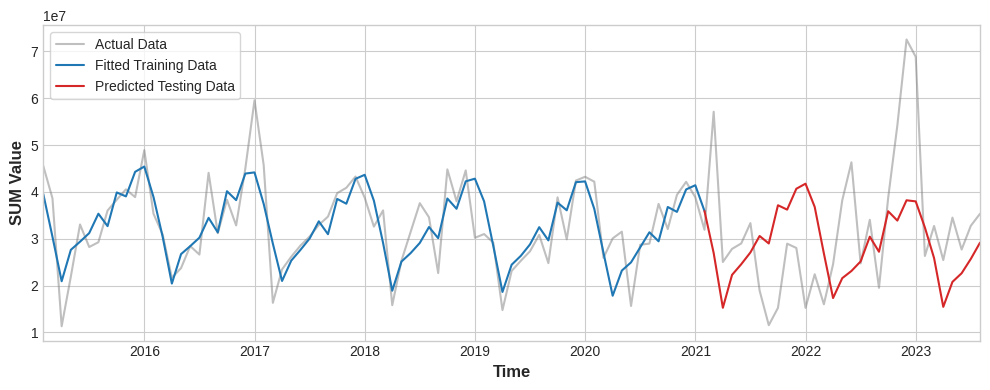

In [ ]:
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y["2015-02-01":"2021-02-01"], y["2021-02-01":]
    X1_train, X1_valid = X_1["2015-02-01":"2021-02-01"], X_1["2021-02-01" :]
    X2_train, X2_valid = X_2.loc["2015-02-01":"2021-02-01"], X_2.loc["2021-02-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 0
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodity = y.columns[0]
    ax = y[commodity].plot(
    figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y.index.min(), end=y.index.max(), freq='YS')

    y_fit[commodity].plot(ax=ax, color='C0', label='Fitted Training Data')

    y_pred[commodity].plot(ax=ax, color='C3', label='Predicted Testing Data')

    ax.set_ylabel('SUM Value')
    ax.set_xlabel('Time')
    ax.legend(loc='upper left', frameon=True)

# # Update the legends
#     for ax in axs:
#         # This will collect the labels & handles and update the legend
#         lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
#         ax.legend(lines, labels, loc='upper left', frameon=True)
#         ax.set_xticks(dates)
#         ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
#         ax.set_ylabel('SUM Value')
#         ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()

plot_model_results(model)

## Analyze with EBIT Increasing Rate

In [ ]:
ebit_link = 'https://www.dropbox.com/scl/fi/0qamdswm3ux8uwdjs1xuk/ebit-margins-of-main-container-shipping-companies-2014-2023.xlsx?rlkey=wa0v2n7c9vrka08xtp1co33gi&dl=1'
EBIT = pd.read_excel(ebit_link)
EBIT

In [ ]:
def monthly_rate_from_quarterly(quarterly_rate):
  quarterly_rate_decimal = quarterly_rate / 100
  return (1 + quarterly_rate_decimal) ** (1/3) - 1

monthly_data = []

for index, row in EBIT.iterrows():
  qtr, year = row['Quarter'].split(' ')
  year = int(year)
  qtr = int(qtr.replace('Q', ''))

  months = [(qtr - 1) * 3 + i for i in range(1, 4)]

  monthly_rate = monthly_rate_from_quarterly(row['increasing rate (%)'])

  for month in months:
    monthly_data.append({
        'Year': year,
        'Month': month,
        'Monthly Rate': monthly_rate
    })

monthly_ebit = pd.DataFrame(monthly_data)
monthly_ebit['Date'] = pd.to_datetime(monthly_ebit['Year'].astype(str) + '-' + monthly_ebit['Month'].astype(str), format='%Y-%m')
monthly_ebit.drop(['Year', 'Month'], axis=1, inplace=True)
monthly_ebit = monthly_ebit.sort_values(by='Date')
monthly_ebit.reset_index(drop=True, inplace=True)
monthly_ebit

In [ ]:
last_rate = monthly_ebit['Monthly Rate'].iloc[-1]
new_rows = pd.DataFrame({
    'Monthly Rate': [last_rate, last_rate],
    'Date': pd.to_datetime(['2023-07-01', '2023-08-01'])
})
monthly_ebit = pd.concat([monthly_ebit, new_rows], ignore_index=True)
monthly_ebit = monthly_ebit.sort_values(by='Date')
monthly_ebit = monthly_ebit.reset_index(drop=True)
monthly_ebit

In [ ]:
monthly_ebit.set_index('Date',inplace=True)

In [ ]:
monthly_ebit

In [ ]:
top_value = SUM_values['84Nuclear_39Plastics']
top_value = top_value[top_value.index > pd.Timestamp('2013-12-01')]
y = top_value.loc[:].squeeze() #Squeeze data from data-frame into pandas series.
y

In [ ]:
top_value1 = SUM_values[['84Nuclear_39Plastics']]
y1 = top_value1[top_value1.index > pd.Timestamp('2013-12-01')]
y1

In [ ]:
# Monthly basis per year
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for Christmas.
X_time['Christmas'] = (X_time.index.month.isin([9, 10, 11]))

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'value_deseasoned'

ax = y_deseason.plot()
ax.set_title("top value commodities (deseasonalized)");

In [ ]:
# create dataframe with n='lags' lags with 'lag_time' and prefixed by 'name'
def make_lags(ts, lags, lag_time=1, name='y'):
    return pd.concat(
        {f'{name}_lag_{i}': ts.shift(i)
         for i in range(lag_time, lags + lag_time)},
        axis=1)

X_lags = make_lags(y_deseason, lags=1, name='y_deseason')

X = pd.concat([X_time, X_lags], axis=1).dropna()

# align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
y, X = y.align(X, join='inner')

In [ ]:
y

In [ ]:
X_1 = X
new_index = pd.to_datetime(['2014-01-01'])
new_rows = pd.DataFrame(index=new_index, columns=X_1.columns)
new_rows.loc[:] = 0
new_rows.loc['2014-01-01', 'trend'] = 1
X_1 = pd.concat([X_1, new_rows]).sort_index()
X_1

In [ ]:
X_2 = pd.DataFrame(top_value1.stack())
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
X_2['IfCovid'] = np.where((X_2.index >= '2020-03-01') & (X_2.index <= '2022-03-01'), '1', '0')
X_2.drop(columns='Commodity', inplace=True)
X_2 = X_2[X_2.index>pd.Timestamp('2013-12-01')]
X_2['FreightEBIT'] = monthly_ebit.reindex(X_2.index)['Monthly Rate']
X_2

In [ ]:
model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y1)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y1[:"2021-02-01"], y1["2021-02-01":]
    X1_train, X1_valid = X_1[: "2021-02-01"], X_1["2021-02-01" :]
    X2_train, X2_valid = X_2.loc[:"2021-02-01"], X_2.loc["2021-02-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 0
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodities = y1.columns[:]
    axs = y1.loc(axis=1)[commodities].plot(
    subplots=True, sharex=True, figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y.index.min(), end=y.index.max(), freq='YS')

# Plot the fitted training data
    for ax, col in zip(axs, commodities):
        y_fit[col].plot(ax=ax, color='C0', label='Fitted Training Data')

# Plot the predicted testing data
    for ax, col in zip(axs, commodities):
        y_pred[col].plot(ax=ax, color='C3', label='Predicted Testing Data')

# Update the legends
    for ax in axs:
        # This will collect the labels & handles and update the legend
        lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
        ax.legend(lines, labels, loc='upper left', frameon=True)
        ax.set_xticks(dates)
        ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
        ax.set_ylabel('SUM Value')
        ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()
plot_model_results(model)

In [ ]:
y2 = SUM_values[SUM_values.index > pd.Timestamp('2013-12-01')]
y2

In [ ]:
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

X_1

In [ ]:
X_2 = pd.DataFrame(SUM_values.stack())
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
X_2['IfCovid'] = np.where((X_2.index >= '2020-03-01') & (X_2.index <= '2022-03-01'), '1', '0')
X_2 = X_2[X_2.index>pd.Timestamp('2013-12-01')]
X_2['FreightEBIT'] = monthly_ebit.reindex(X_2.index)['Monthly Rate']
X_2

In [ ]:
model = BoostedHybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

# Weight

In [ ]:
top_weight = SUM_weight['22 Beverages, Spirits And Vinegar']
y = top_weight.loc[:].squeeze() #Squeeze data from data-frame into pandas series.
y

In [ ]:
y.plot.line()

In [ ]:
# Monthly basis per year
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for Christmas.
X_time['Christmas'] = (X_time.index.month.isin([9, 10, 11]))

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'weight_deseasoned'

ax = y_deseason.plot()
ax.set_title("top weight commodity (deseasonalized)");

In [ ]:
plot_acf(y_deseason, lags=12);

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=2);

In [ ]:
# create dataframe with n='lags' lags with 'lag_time' and prefixed by 'name'
def make_lags(ts, lags, lag_time=1, name='y'):
    return pd.concat(
        {f'{name}_lag_{i}': ts.shift(i)
         for i in range(lag_time, lags + lag_time)},
        axis=1)

X_lags = make_lags(y_deseason, lags=1, name='y_deseason')

X = pd.concat([X_time, X_lags], axis=1).dropna()

# align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
y, X = y.align(X, join='inner')

In [ ]:
X

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index=X_train.index).clip(0.0) #.clip(0.0) removes negative values
y_pred = pd.Series(model.predict(X_valid), index=X_valid.index).clip(0.0) #.clip(0.0) removes negative values

rmse_train = mean_squared_error(y_train, y_fit, squared=False)
rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
print(f'Training RMSE: {rmse_train:.5f}')
print(f'Validation RMSE: {rmse_valid:.5f}')

ax = y.plot(**plot_params, alpha=0.5, title="Top Value Commodities imported into Massport", ylabel="Value")
ax = y_fit.plot(ax=ax, label="Fitted", color='C0')
ax = y_pred.plot(ax=ax, label="Forecast", color='C3')
ax.legend();

In [ ]:
y = SUM_weight
y.fillna(0,inplace=True)
y

In [ ]:
X_1 = X
new_index = pd.to_datetime(['2003-01-01'])
new_rows = pd.DataFrame(index=new_index, columns=X_1.columns)
new_rows.loc[:] = 0
new_rows.loc['2003-01-01', 'trend'] = 1
X_1 = pd.concat([X_1, new_rows]).sort_index()
X_1

In [ ]:
SUM_weight.fillna(0,inplace=True)
X_2 = pd.DataFrame(SUM_weight.stack())
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
X_2

In [ ]:
model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y[:"2020-07-01"], y["2020-07-02":]
    X1_train, X1_valid = X_1[: "2020-07-01"], X_1["2020-07-02" :]
    X2_train, X2_valid = X_2.loc[:"2020-07-01"], X_2.loc["2020-07-02":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 1
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodities = y.columns[1:2]
    axs = y.loc(axis=1)[commodities].plot(
    subplots=True, sharex=True, figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y.index.min(), end=y.index.max(), freq='YS')

# Plot the fitted training data
    for ax, col in zip(axs, commodities):
        y_fit[col].plot(ax=ax, color='C0', label='Fitted Training Data')

# Plot the predicted testing data
    for ax, col in zip(axs, commodities):
        y_pred[col].plot(ax=ax, color='C3', label='Predicted Testing Data')

# Update the legends
    for ax in axs:
        # This will collect the labels & handles and update the legend
        lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
        ax.legend(lines, labels, loc='upper left', frameon=True)
        ax.set_xticks(dates)
        ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
        ax.set_ylabel('Weight')
        ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()
plot_model_results(model)

# #TEU by Country of Origin

In [9]:
link = 'https://www.dropbox.com/scl/fi/hwzm7wonvkyd0tqa79ocl/df_import.csv?rlkey=r20pf5icufzruyeqweksba8gq&dl=1'
df_import = pd.read_csv(link)
df_import['Date'] = pd.to_datetime(df_import['Date'])

C:\Users\k_pow\AppData\Local\Temp\ipykernel_36748\3021128520.py:2: DtypeWarning: Columns (10,34,46,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_import = pd.read_csv(link)
C:\Users\k_pow\AppData\Local\Temp\ipykernel_36748\3021128520.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_import['Date'] = pd.to_datetime(df_import['Date'])


In [10]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149336 entries, 0 to 149335
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    149336 non-null  int64         
 1   Date                          149336 non-null  datetime64[ns]
 2   Year                          149336 non-null  int64         
 3   Month                         149336 non-null  int64         
 4   HS Code                       146390 non-null  object        
 5   Product Description           149336 non-null  object        
 6   Quantity                      149336 non-null  int64         
 7   Unit                          149336 non-null  object        
 8   Total Value USD               149336 non-null  float64       
 9   Origin Country                149257 non-null  object        
 10  Export Country                6562 non-null    object        
 11  Importer     

In [12]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

df_import

Unnamed: 0       Date  Year  Month HS Code  \
0                0 2023-06-29  2023      6  841920   
1                1 2023-06-29  2023      6  940340   
2                2 2023-06-29  2023      6  940180   
3                3 2023-06-29  2023      6  847960   
4                4 2023-06-29  2023      6  731813   
...            ...        ...   ...    ...     ...   
149331      149331 2021-09-20  2021      9  271019   
149332      149332 2021-09-20  2021      9  950349   
149333      149333 2021-09-20  2021      9  392290   
149334      149334 2021-09-20  2021      9  271011   
149335      149335 2021-09-20  2021      9  950349   

                                      Product Description  Quantity Unit  \
0                        LABORATORY PLASTIC PRODUCTS<br/>      2545  CAS   
1              KITCHEN CABINETS HS CODE 9403.40.0000<br/>       779  CTN   
2       FSC RECYCLED 100% WOODEN FURNITURE (FSC CERTIF...        96  CTN   
3       THERMOELECTRIC COOLERS THIS SHIPMENT CONTAINS ...       228  PCS   
4                                              SCREW<br/>      2496  PKG   
...                                                   ...       ...  ...   
149331           15,000 BBLS ULTRA LOW SULFUR DIESEL<br/>         1  LBK   
149332                                PLASTIC TOYS .<br/>        50  CTN   
149333                          PLASTIC KITCHEN WARE<br/>      3828  CTN   
149334         170,000 BBLS WINTER REG RBOB GASOLINE<br/>         1  LBK   
149335                                PLASTIC TOYS .<br/>        50  CTN   

        Total Value USD Origin Country Export Country  \
0                   0.0    South Korea            NaN   
1                   0.0    South Korea            NaN   
2                   0.0        Vietnam            NaN   
3                   0.0            NaN            NaN   
4                   0.0          China            NaN   
...                 ...            ...            ...   
149331              0.0         Canada        Unknown   
149332              0.0        Germany        Unknown   
149333              0.0          China        Unknown   
149334              0.0         Canada        Unknown   
149335              0.0        Germany        Unknown   

                             Importer  \
0       CELLTREAT SCIENTIFIC PRODUCTS   
1                      PRINTGUARD INC   
2                 BAKER FURNITURE LTD   
3                      JDS CONSULTING   
4                                 NaN   
...                               ...   
149331           IRVING OIL TERMINALS   
149332                            NaN   
149333            DIRECT LINK USA LLC   
149334           IRVING OIL TERMINALS   
149335                            NaN   

                                           Supplier  actual arrival date  \
0                          SPL LIFE SCIENCES CO LTD             20230629   
1                         FLOURISH TIMBER M SDN BHD             20230629   
2                      PGT RECLAIMED VIETNAM CO LTD             20230629   
3       ZHONGSHAN CANDOR ELECTRIC APPLIANCES CO LTD             20230629   
4                                               NaN             20230629   
...                                             ...                  ...   
149331                    IRVING OIL REFINING GROUP             20210920   
149332                                          NaN             20210920   
149333               TAIZHOU FULING PLASTICS CO LTD             20210920   
149334                    IRVING OIL REFINING GROUP             20210920   
149335                                          NaN             20210920   

          bill of lading bill type code               carrier sasc code  \
0       FTNVKRS000001988              H                            FTNV   
1       PWTDPGUBOS182582              H                            PWTD   
2         BANQ1052572438              H       BANQ, KUEHNE & NAGEL INC.   
3       RSLCSNAF2304526A              H  RSLC, ROSELLE 

In [16]:
df_import_CoO = df_import.groupby(['Date','Origin Country'])['teu'].sum().unstack()
df_import_CoO.fillna(0,inplace=True)
df_import_CoO

Origin Country  Albania  Algeria  Andorra  Angola  Anguilla  Argentina  Aruba  \
Date                                                                            
2021-01-01          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2021-01-02          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2021-01-03          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2021-01-04          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2021-01-05          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
...                 ...      ...      ...     ...       ...        ...    ...   
2023-06-25          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2023-06-26          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2023-06-27          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2023-06-28          0.0      0.0      0.0     0.0       0.0        0.0    0.0   
2023-06-29          0.0      0.0      0.0     0.0       0.0        0.0    0.0   

Origin Country  Australia  Austria  Bahamas  Bahrain  Bangladesh  Belgium  \
Date                                                                        
2021-01-01            0.0     2.00      0.0     51.0         0.0   440.49   
2021-01-02            0.0     0.00      0.0      0.0         0.0     0.00   
2021-01-03            0.0     0.00      0.0      0.0         0.0     0.00   
2021-01-04            0.0     0.00      0.0      0.0         0.0     0.00   
2021-01-05            0.0     0.00      0.0      0.0         0.0     5.00   
...                   ...      ...      ...      ...         ...      ...   
2023-06-25            0.0     0.00      0.0      0.0         0.0     0.00   
2023-06-26            0.0     0.00      0.0      0.0         0.0     1.50   
2023-06-27            0.0    29.35      0.0      0.0         0.0   199.35   
2023-06-28            0.0     0.00      0.0      0.0         0.0     0.00   
2023-06-29            0.0     0.00      0.0      0.0         0.0     0.00   

Origin Country  Benin  Bermuda  Bolivia  Brazil  Bulgaria  Cambodia  Cameroon  \
Date                                                                            
2021-01-01        0.0      0.0      0.0     1.5       2.0       0.0       0.0   
2021-01-02        0.0      0.0      0.0     0.0       0.0       0.0       0.0   
2021-01-03        0.0      0.0      0.0     0.0       0.0       0.0       0.0   
2021-01-04        0.0      0.0      0.0     0.0       0.0       0.0       0.0   
2021-01-05        0.0      0.0      0.0     0.0       0.0       0.0       0.0   
...               ...      ...      ...     ...       ...       ...       ...   
2023-06-25        0.0      0.0      0.0     0.0       0.0       2.0       0.0   
2023-06-26        0.0      0.0      0.0     0.0       0.0       0.0       0.0   
2023-06-27        0.0      0.0      0.0     0.0       0.0       0.0       0.0   
2023-06-28        0.0      0.0      0.0     0.0       0.0       0.0       0.0   
2023-06-29        0.0      0.0      0.0     0.0       0.0       0.0       0.0   

Origin Country  Canada  Chad  Chile  China  Colombia  Comoros  Costa Rica  \
Date                                                                        
2021-01-01         0.0   0.0    0.0   34.0       0.0      0.0         0.0   
2021-01-02         0.0   0.0    0.0    4.0       0.0      0.0         0.0   
2021-01-03         0.0   0.0    0.0    0.0       0.0      0.0         0.0   
2021-01-04         0.0   0.0    0.0    5.5       0.0      0.0         1.0   
2021-01-05         0.0   0.0    0.0    0.0       0.0      0.0         0.0   
...                ...   ...    ...    ...       ...      ...         ...   
2023-06-25         0.0   0.0    0.0   17.5       0.0      0.0         0.0   
2023-06-26         0.0   0.0    0.0    4.0       0.0      0.0         0.0   
2023-06-27         0.0   0.0    0.0   26.0       0.0      0.0         0.0   
2023-06-28         0.0   0.0    0.0    3.0 

In [17]:
top10_teu_CO = df_import.groupby('Origin Country')['teu'].sum().nlargest(10).index
filtered_CO = df_import[df_import['Origin Country'].isin(top10_teu_CO)]
SUM_teu_CO = filtered_CO.groupby(['Date','Origin Country'])['teu'].sum().unstack()
SUM_teu_CO.fillna(0,inplace=True)
SUM_teu_CO

Origin Country  Belgium  China  France  Germany  India  Italy  \
Date                                                            
2021-01-01       440.49   34.0    25.5   291.47   4.50   39.5   
2021-01-02         0.00    4.0     0.0     0.00   0.00    0.0   
2021-01-04         0.00    5.5     0.0     0.00   0.00    0.0   
2021-01-05         5.00    0.0     0.0     0.00   0.00    0.0   
2021-01-06         0.00   14.0     0.0     0.00   0.00    0.0   
...                 ...    ...     ...      ...    ...    ...   
2023-06-25         0.00   17.5     0.0     0.00  94.56    0.0   
2023-06-26         1.50    4.0     0.0     0.00   0.00    0.0   
2023-06-27       199.35   26.0    34.5   128.50  67.19    0.0   
2023-06-28         0.00    3.0     0.0     0.00   0.00    0.0   
2023-06-29         0.00   51.5     0.0     0.00   0.00    5.5   

Origin Country  Netherlands Antilles  Portugal  Spain  Vietnam  
Date                                                            
2021-01-01                    123.09      2.02   30.0     26.5  
2021-01-02                      0.00      0.00    0.0      0.0  
2021-01-04                      0.00      0.00    0.0      0.0  
2021-01-05                      0.00      0.00    0.0      0.0  
2021-01-06                      0.00      0.00    0.0      0.0  
...                              ...       ...    ...      ...  
2023-06-25                      0.00      0.00    0.0     66.2  
2023-06-26                      0.00      0.00    0.0      0.0  
2023-06-27                      0.00      0.00    4.0      9.0  
2023-06-28                      0.00      0.00    0.0      1.5  
2023-06-29                      0.00      0.00    0.0      2.0  

[840 rows x 10 columns]

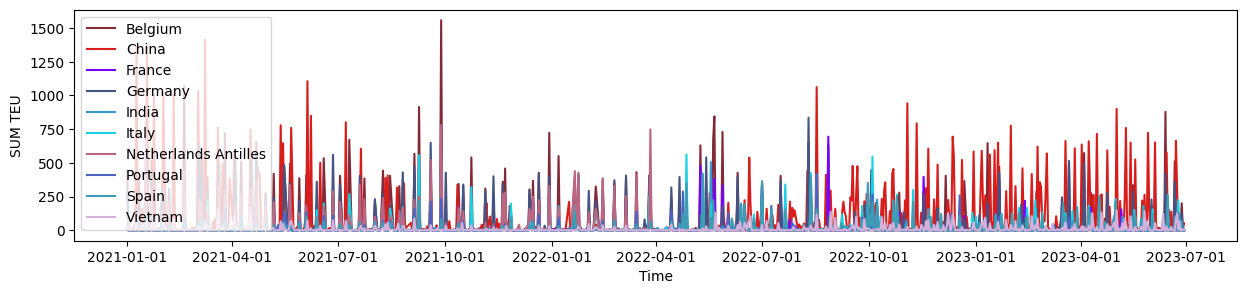

In [18]:
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,3))

for country in SUM_teu_CO.columns:
  plt.plot(SUM_teu_CO.index, SUM_teu_CO[country], label=f'{country}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Time')
plt.ylabel('SUM TEU')
plt.legend(loc='upper left')
plt.show()

In [19]:
monthly_data = SUM_teu_CO.resample('M').sum()
monthly_data

C:\Users\k_pow\AppData\Local\Temp\ipykernel_36748\826375142.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = SUM_teu_CO.resample('M').sum()


Origin Country  Belgium    China   France  Germany   India    Italy  \
Date                                                                  
2021-01-31      2145.59  4486.63   222.19  1683.72  295.02   435.50   
2021-02-28      1389.26  2193.80   262.05   567.53  176.16   155.50   
2021-03-31      2352.66  4547.12   351.96  2134.46  390.21   502.04   
2021-04-30      2209.51  3078.07   486.09  2098.48  332.82   494.06   
2021-05-31      1767.18  2660.42   428.50  1296.94  327.49   371.00   
2021-06-30      1522.97  2908.78   309.14  1051.17  221.70   657.11   
2021-07-31      1550.24  1636.00   286.00   997.80  128.20   501.02   
2021-08-31      1778.99  1802.03   574.63  1164.77  196.70   642.46   
2021-09-30      3535.56   709.28   465.00  1799.10  426.36  1152.42   
2021-10-31      1294.19   815.09   229.50  1102.54  117.18   393.57   
2021-11-30      1734.96   953.77   365.50  1113.91  267.27   486.58   
2021-12-31      1873.62   249.06   274.02  1403.94  240.54   430.00   
2022-01-31      1298.76   465.05   259.00   845.41  111.18   458.68   
2022-02-28      1217.79   368.04   397.00  1172.12  128.68   313.00   
2022-03-31      1566.06   192.05   234.00  1300.14   77.60   593.52   
2022-04-30       490.72   294.55   361.74   797.74  289.32   792.54   
2022-05-31      3093.74   870.51  1493.51  1136.27  760.73   637.55   
2022-06-30       455.15  2153.29   319.54   483.66  290.44   571.02   
2022-07-31       769.58  1994.15   842.97   713.05  351.20   747.97   
2022-08-31      1308.54  3069.16  1081.02   970.01  212.86   915.17   
2022-09-30       306.61  3395.92   233.60   412.50  279.94   689.86   
2022-10-31       982.88  3070.33   842.02   754.80  427.23  1211.58   
2022-11-30       289.54  4198.09   577.50   494.50  134.68   632.40   
2022-12-31       780.58  3194.17   294.50   328.11  166.18   403.05   
2023-01-31      1158.54  4705.93   722.50   807.47  358.94   390.09   
2023-02-28       524.06  3103.64   480.00   547.50  379.91   721.24   
2023-03-31       693.50  2868.03   345.00   836.00  477.30   543.14   
2023-04-30      1303.75  3748.72   430.87  1012.52  275.04   495.07   
2023-05-31       458.50  4902.78   476.06   312.55  472.24   689.51   
2023-06-30      1792.34  2949.50   342.63  1167.76  506.63   565.59   

Origin Country  Netherlands Antilles  Portugal    Spain  Vietnam  
Date                                                              
2021-01-31                   1405.10    222.59   335.00   498.16  
2021-02-28                    639.53     80.50   105.55   152.00  
2021-03-31                   1214.09    249.00   381.06   392.52  
2021-04-30                   1332.35    170.12   259.11   442.00  
2021-05-31                    827.70    273.00   220.00   293.91  
2021-06-30                    754.95    408.52   295.52   209.00  
2021-07-31                    900.37    104.00   174.00   135.52  
2021-08-31                    766.00    197.52   274.71   282.00  
2021-09-30                   1802.66    638.08   417.00   143.00  
2021-10-31                    394.07     74.00    78.00   152.02  
2021-11-30                    830.48    157.52   195.52    98.50  
2021-12-31                   1124.47    209.04   175.50    67.00  
2022-01-31                   1119.08    118.54   210.27    54.00  
2022-02-28                   1025.70    126.00   157.50   135.00  
2022-03-31                   1551.97    211.52   142.50    42.00  
2022-04-30                     20.00    630.60   629.54    60.50  
2022-05-31                     37.50    390.62   865.88   208.25  
2022-06-30                     15.50    659.74   795.44   475.00  
2022-07-31                     35.00    507.23   808.12   207.64  
2022-08-31                     18.00    738.80   669.00   398.78  
2022-09-30                      1.50    392.44   783.86   450.26  
2022-10-31                      0.00    781.39  1081.85   437.82  
2022-11-30                      5.00    322.64   523.52   390.58  
2022-12-31                      0.00    529.92   351

In [20]:
y = monthly_data['China'] #Squeeze data from data-frame into pandas series.
y

Date
2021-01-31    4486.63
2021-02-28    2193.80
2021-03-31    4547.12
2021-04-30    3078.07
2021-05-31    2660.42
2021-06-30    2908.78
2021-07-31    1636.00
2021-08-31    1802.03
2021-09-30     709.28
2021-10-31     815.09
2021-11-30     953.77
2021-12-31     249.06
2022-01-31     465.05
2022-02-28     368.04
2022-03-31     192.05
2022-04-30     294.55
2022-05-31     870.51
2022-06-30    2153.29
2022-07-31    1994.15
2022-08-31    3069.16
2022-09-30    3395.92
2022-10-31    3070.33
2022-11-30    4198.09
2022-12-31    3194.17
2023-01-31    4705.93
2023-02-28    3103.64
2023-03-31    2868.03
2023-04-30    3748.72
2023-05-31    4902.78
2023-06-30    2949.50
Freq: ME, Name: China, dtype: float64

<Axes: xlabel='Date'>

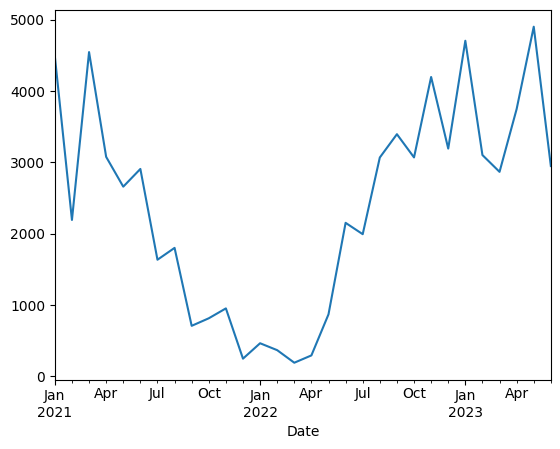

In [21]:
y.plot.line()

In [22]:
# 4 pairs per month as we did for the full average sales.
fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for new years day.
X_time['NewYearsDay'] = (X_time.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'TEU_deseasoned'

ax = y_deseason.plot()
ax.set_title("TEU (deseasonalized)");

NameError: name 'CalendarFourier' is not defined

In [ ]:
plot_acf(y_deseason, lags=12);

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=2);

In [ ]:
y = monthly_data.loc[:]

y

# XGBoost

In [ ]:
!pip install shap
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Creates time series features from datetime index
def create_features(df, label=None, extra_features=None):
    df = df.copy()
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    # df['dayofweek'] = df['date'].dt.dayofweek
    # df['dayofmonth'] = df['date'].dt.day
    df.drop(columns=['date'], errors='ignore', inplace=True)
    return df

def lag_features(df, value_column):
    df = df.copy()
    for i in range(1, 13):
        df[f'{value_column}_lag_{i}'] = df[value_column].shift(i)
    df.dropna(inplace=True)
    return df

def SMA_features(df, value_column):
    df = df.copy()
    for i in range(2, 13):
        df[f'SMA_{i}'] = df[value_column].rolling(window=i).mean().shift(1)
    df.dropna(inplace=True)
    return df

# Function to train XGBoost model
def train_XGBoost(df, target_column, num_months=24, verbose=True):
    df_with_time = create_features(df, label=target_column)
    df_with_lags = lag_features(df_with_time, target_column)
    df_with_features = SMA_features(df_with_lags, target_column)

    # Split the data into train and test sets
    train_size = int(len(df_with_features) * 0.8)
    train, test = df_with_features.iloc[:train_size, :], df_with_features.iloc[train_size:, :]

    # Extract features and target
    X_train = train.drop(columns=[target_column])
    y_train = train[target_column]
    X_test = test.drop(columns=[target_column])
    y_test = test[target_column]

    # Train the model
    reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    reg.fit(X_train, y_train, verbose=verbose)

    # Find the best feature from lags and SMAs
    lagfeatures = [col for col in X_train.columns if 'lag_' in col]
    smafeatures = [col for col in X_train.columns if 'SMA_' in col]
    feature_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
    best_lag_feature = feature_importances[lagfeatures].idxmax()
    # best_lag_feature_importance = feature_importances[best_lag_feature]
    best_sma_feature = feature_importances[smafeatures].idxmax()
    # best_sma_feature_importance = feature_importances[best_sma_feature]
    print(f"Best lag feature: {best_lag_feature}")
    print(f"Best SMA feature: {best_sma_feature}")

    # Only keep the best feature in training
    time_features = ['month', 'year']
    best_features = time_features + [best_lag_feature] + [best_sma_feature]
    X_train_best = X_train[best_features]
    X_test_best = X_test[best_features]

    # Retrain XGBoost
    reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    reg.fit(X_train_best, y_train,
            eval_set=[(X_test_best, y_test)],
            # early_stopping_rounds=50,
            verbose=False)

    # Plot feature importance
    _ = plot_importance(reg)
    plt.tight_layout()
    plt.show()

    # Calculate SHAP values
    explainer = shap.Explainer(reg)
    shap_values = explainer(X_train_best)
    shap.plots.waterfall(shap_values[0])
    shap.plots.beeswarm(shap_values)

    # Make predictions
    # test['Prediction'] = reg.predict(X_test_best)
    train['fitted'] = reg.predict(X_train_best)

    # last_known_date = df.index[-1]
    # last_known_values = df[target_column].dropna().tail(12).tolist()  # Last known values for the lag features

    # future_dates = pd.date_range(start=last_known_date + pd.offsets.MonthBegin(1), periods=24, freq='MS')
    # future_df = pd.DataFrame(index=future_dates, columns=df.columns)
    # future_df = create_features(future_df, label=target_column)

    # # Populate the lag features for future dates
    # for i in range(1, 13):
    #     future_df[f'{target_column}_lag_{i}'] = last_known_values[i-1] if i <= len(last_known_values) else np.nan

    # # Populate SMA features for future dates based on known values
    # for i in range(2, 13):
    #     future_df[f'SMA_{i}'] = df[target_column].rolling(window=i).mean().iloc[-1]

    # # Prepare the features for the model prediction
    # X_future = future_df[best_features]

    # # Predict future values
    # future_predictions = reg.predict(X_future)
    # future_df['Prediction'] = future_predictions

    # Plotting all: actual train, predicted test, and future predictions
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df[target_column], label='Actual Data', color='gray', alpha=0.5)
    plt.plot(train.index, train['fitted'], label='Fitted Train', color='blue')
    plt.plot(test.index, test['Prediction'], label='Predicted Test', color='red')
    # plt.plot(future_df.index, future_df['Prediction'], label='Forecasted Future', color='green')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.legend()
    plt.show()

    # Calculate metrics
    rmse_xgb = mean_squared_error(y_test, test['Prediction'], squared=False)
    mae_xgb = mean_absolute_error(y_test, test['Prediction'])
    mape_xgb = mean_absolute_percentage_error(y_test, test['Prediction'])

    print(f"RMSE XGB: {rmse_xgb}")
    print(f"MAE XGB: {mae_xgb}")
    print(f"MAPE XGB: {mape_xgb}")

    return reg, rmse_xgb, mae_xgb, mape_xgb, future_df, future_predictions

In [ ]:
train_XGBoost(Value_84_39, '84Nuclear_39Plastics')

Best lag feature: 22 Beverages, Spirits And Vinegar_lag_8
Best SMA feature: SMA_10


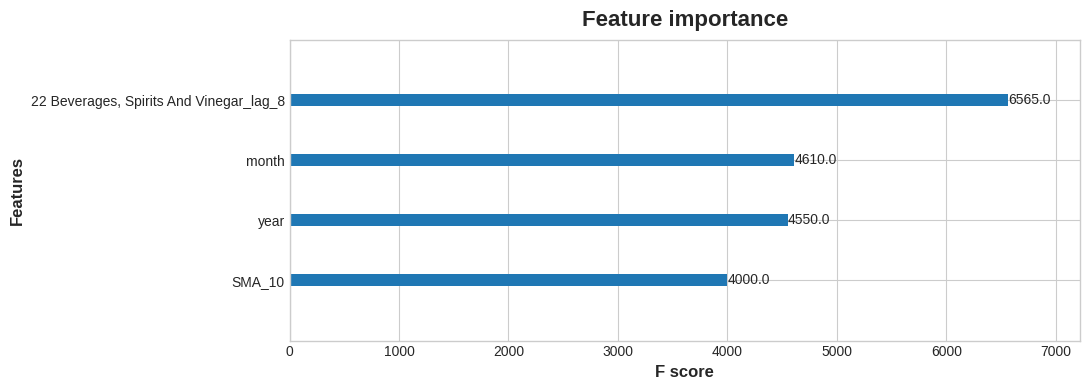

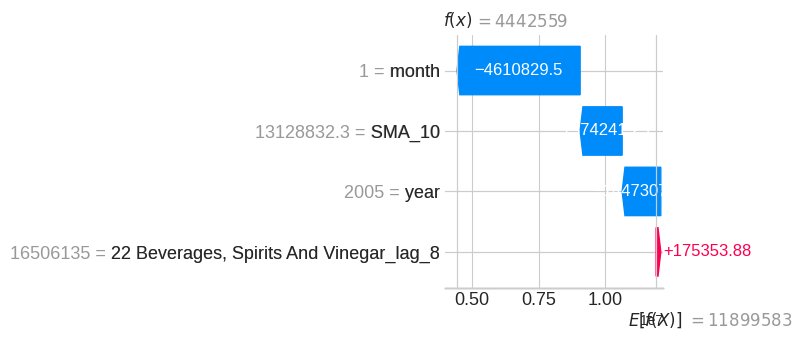

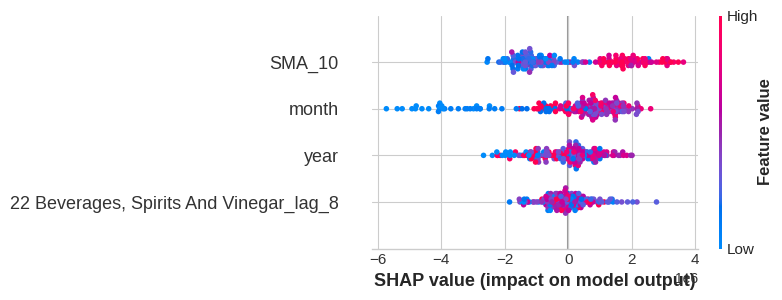

KeyError: 'Prediction'

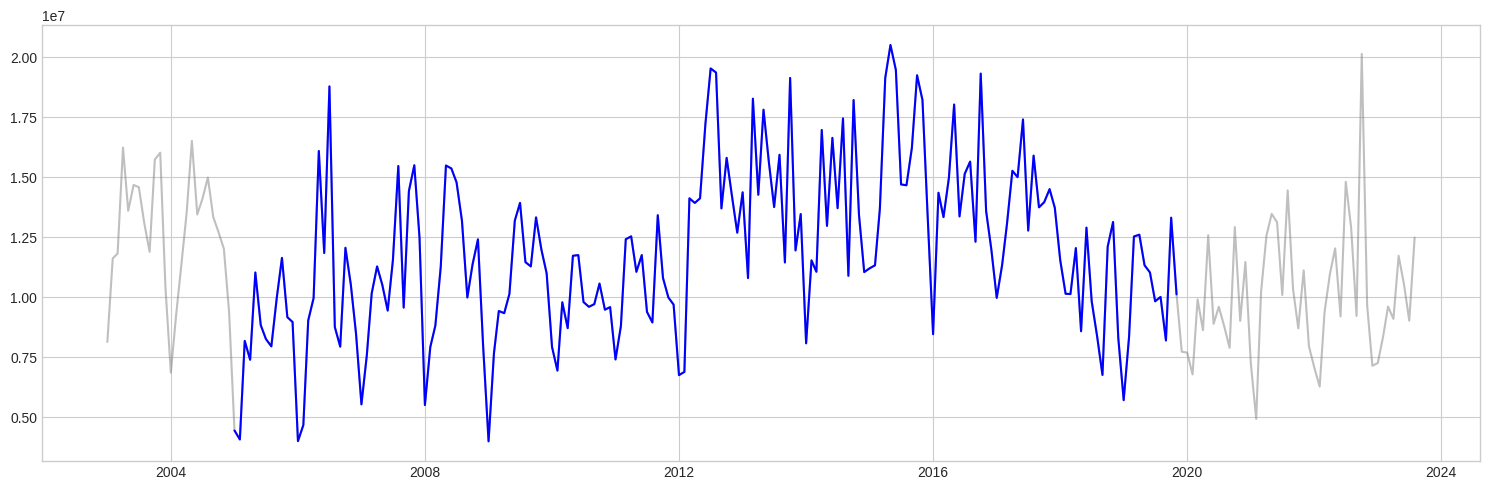

In [ ]:
train_XGBoost(Weight_HS22, '22 Beverages, Spirits And Vinegar')

In [ ]:
target_columns = SUM_values.columns
models_metrics = {}

for target_column in target_columns:
    print(f"Training model for {target_column}")
    reg_model, rmse_value, mae_value, mape_value = train_XGBoost(SUM_values, target_column)
    models_metrics[target_column] = {
        'model': reg_model,
        'RMSE': rmse_value,
        'MAE': mae_value,
        'MAPE': mape_value
    }

In [ ]:
target_columns = ['03 Fish, Crustaceans & Aquatic Invertebrates','22 Beverages, Spirits And Vinegar','68 Art Of Stone, Plaster, Cement, Asbestos, Mica Etc.']
models_metrics = {}

for target_column in target_columns:
    print(f"Training model for {target_column}")
    reg_model, rmse_value, mae_value, mape_value = train_XGBoost(SUM_weight, target_column)
    models_metrics[target_column] = {
        'model': reg_model,
        'RMSE': rmse_value,
        'MAE': mae_value,
        'MAPE': mape_value
    }

In [ ]:
shiplink = 'https://www.dropbox.com/scl/fi/pqo7wehwwk06jzttq8v01/shipsData.csv?rlkey=vvtt15ixfzzlv2rhcn7ec8v4b&dl=1'
ships = pd.read_csv(shiplink)
ships.head()

In [ ]:
sorted_by_operators = ships.sort_values(by='Operator')

In [ ]:
sorted_by_operators.reset_index(inplace=True)

In [ ]:
sorted_by_operators.head()

In [ ]:
sorted_by_operators.to_csv('ships.csv')

In [ ]:
ships['Operator'].nunique()

In [ ]:
ships.groupby('Operator')[['Length','Width']].describe().T

# LSTM

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn import set_config
from IPython.display import display

from sklearn.linear_model import LinearRegression
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation

In [ ]:
# Setup plotting
plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [ ]:
train_df, test_df = train_test_split(Value_84_39, random_state=42, shuffle=False)

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    ts = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        ts.append(X.iloc[i + time_steps].name)
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys), ts

In [ ]:
train_df.head()

In [ ]:
time_steps = 12

X_train, y_train, ts_train = create_dataset(train_df, train_df['84Nuclear_39Plastics'], time_steps=time_steps)
X_test, y_test, ts_test = create_dataset(test_df, test_df['84Nuclear_39Plastics'], time_steps=time_steps)

print(X_train.shape, y_train.shape)

In [ ]:
model = keras.Sequential([
    layers.LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(units=1)
])

model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.00001,
    restore_best_weights=True,
)


history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False,
    # callbacks=[early_stopping],
)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();